### **Soil Moisture & Rainfall Data Analysis (SENTINEL-PAGASA BUCAF AWS-Project SARAi)**

##### _**Import dependencies**_

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

##### _**show bar graph values function**_

In [95]:
# function for showing values for each bar in bar plots
def show_values_on_bars(axs, orient='v',space=0, num=2):
    def _show_on_single_plot(ax):  
        if orient == 'v':
            for p in ax.patches:
                if num == 4:
                    _x = p.get_x() + p.get_width() / 2
                    _y = p.get_y() + p.get_height() + space
                    value = '{:.4f}'.format(p.get_height())
                    ax.text(_x, _y, value, ha="center")
                if num == 2:
                    _x = p.get_x() + p.get_width() / 2
                    _y = p.get_y() + p.get_height() + space
                    value = '{:.2f}'.format(p.get_height())
                    ax.text(_x, _y, value, ha="center")
                else:
                    _x = p.get_x() + p.get_width() / 2
                    _y = p.get_y() + p.get_height() + space
                    value = '{:.0f}'.format(p.get_height())
                    ax.text(_x, _y, value, ha="center")
        if orient == 'h':
            for p in ax.patches:
                if num == 4:
                    _x = p.get_x() + p.get_width() + float(space)
                    _y = p.get_y() + p.get_height() / 2
                    value = '{:.4f}'.format(p.get_width())
                    ax.text(_x, _y, value, ha="left")
                else:
                    _x = p.get_x() + p.get_width() + float(space)
                    _y = p.get_y() + p.get_height() / 2
                    value = '{:.2f}'.format(p.get_width())
                    ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

### _**SENTINEL (Experimental dataset)**_

##### _**Yearly Average / Total**_

In [96]:
sentinel = pd.read_csv('data/SENTINEL.csv')
sentinel.Date = pd.to_datetime(sentinel.Date, yearfirst=True)
sentinel_yearly = sentinel.groupby([sentinel.Year, sentinel.Brgy]).agg(['mean','sum'])
#yearly.to_csv('sentinel_yearly.csv')
sentinel_yearly

Soil_Moisture          
                               mean       sum
Year Brgy                                    
2016 Agpay                 0.480053  4.320474
     Binogsacan Lower      0.483753  4.353780
     Binogsacan Upper      0.549886  4.948977
     Calzada               0.501046  4.509412
     Catomag               0.539041  4.851368
     Malabnig              0.552781  4.975027
     Morera                0.522425  4.701826
2017 Agpay                 0.509811  6.117738
     Binogsacan Lower      0.512896  6.154749
     Binogsacan Upper      0.521941  6.263290
     Calzada               0.505594  6.067128
     Catomag               0.510194  6.122326
     Malabnig              0.507118  6.085415
     Morera                0.472174  5.666085
2018 Agpay                 0.513405  6.160864
     Binogsacan Lower      0.541549  6.498592
     Binogsacan Upper      0.529628  6.355532
     Calzada               0.446757  5.361080
     Catomag               0.525120  6.301446
     Malabnig              0.508888  6.106659
     Morera                0.508456  6.101470
2019 Agpay                 0.517548  3.105290
     Binogsacan Lower      0.525540  3.153243
     Binogsacan Upper      0.524570  3.147418
     Calzada               0.444123  2.664740
     Catomag               0.518255  3.109530
     Malabnig              0.513674  3.082041
     Morera                0.507112  3.042675
2020 Agpay                 0.518832  6.225985
     Binogsacan Lower      0.524550  6.294604
     Binogsacan Upper      0.519228  6.230740
     Calzada               0.484644  5.815732
     Catomag               0.529497  6.353964
     Malabnig              0.511992  6.143905
     Morera                0.475696  5.708348

##### _**Monthly Average/Total**_

In [97]:
sentinel['id'] = sentinel.Date.dt.month
sentinel_monthly = sentinel.groupby([sentinel.Date.dt.strftime('%b'),sentinel.Brgy]).agg(['mean','sum']).drop(labels='Year', axis=1)
sentinel_monthly = sentinel_monthly.sort_values(by=[('id','mean'),'Brgy'])
sentinel_monthly = sentinel_monthly.drop(columns=[('id','sum')],axis=1)
sentinel_monthly
#monthly.to_csv('sentinel_monthly.csv')


Soil_Moisture              id
                               mean       sum  mean
Date Brgy                                          
Jan  Agpay                 0.531168  2.124674   1.0
     Binogsacan Lower      0.557662  2.230647   1.0
     Binogsacan Upper      0.546078  2.184312   1.0
     Calzada               0.531233  2.124933   1.0
     Catomag               0.535628  2.142511   1.0
...                             ...       ...   ...
Dec  Binogsacan Upper      0.548965  2.744825  12.0
     Calzada               0.478323  2.391613  12.0
     Catomag               0.538790  2.693949  12.0
     Malabnig              0.546018  2.730088  12.0
     Morera                0.514544  2.572722  12.0

[84 rows x 3 columns]

##### _**Overall Average per Brgy**_

In [98]:
sentinel_avg_brgy = sentinel.drop(labels=['Year','id'], axis=1).groupby(sentinel.Brgy).mean().reset_index()
#avg_brgy.to_csv('sentinel_avg_brgy.csv', index=False)
sentinel_avg_brgy

,Brgy,Soil_Moisture
0,Agpay,0.508438
1,Binogsacan Lower,0.518725
2,Binogsacan Upper,0.528352
3,Calzada,0.478786
4,Catomag,0.524287
5,Malabnig,0.517511
6,Morera,0.494518


##### _**Monthly average of Brgy per year**_

In [99]:
sentinel_avg_brgy_monthly_year = sentinel.groupby([sentinel.Date.dt.year, sentinel.Date.dt.strftime('%b'), sentinel.Brgy]).mean().drop(labels='Year',axis=1)
#avg_brgy_monthly_year = sentinel_avg_brgy_monthly_year.sort_values(by=['Year', 'id'])
#avg_brgy_monthly_year = avg_brgy_monthly_year.rename_axis(index={'Date':'year', 'Date':'month'})
#avg_brgy_monthly_year.to_csv('SENTINEL_brgy_monthly_year.csv')
sentinel_avg_brgy_monthly_year

Soil_Moisture   id
Date Date Brgy                                
2016 Apr  Agpay                  0.534529  4.0
          Binogsacan Lower       0.402420  4.0
          Binogsacan Upper       0.551414  4.0
          Calzada                0.545455  4.0
          Catomag                0.542972  4.0
...                                   ...  ...
2020 Sep  Binogsacan Upper       0.501257  9.0
          Calzada                0.461235  9.0
          Catomag                0.525270  9.0
          Malabnig               0.536276  9.0
          Morera                 0.495253  9.0

[357 rows x 2 columns]

### _**PAGASA BUCAF AWS (Validation dataset)**_

In [100]:
aws = pd.read_csv('data/AWS.csv')
aws.rename(
    columns={'DATE':'date','RAINFALL':'rain'},
    inplace=True
)
aws.rain = aws.rain.str.replace('T','0.025')
aws.rain = pd.to_numeric(aws.rain, errors='coerce')
aws.date = pd.to_datetime(aws.date, format='%d/%m/%Y')
#aws.to_csv('aws_set.csv', index=False)
aws

,date,rain
0,2016-01-01,11.3
1,2016-01-02,7.0
2,2016-01-03,0.0
3,2016-01-04,0.0
4,2016-01-05,19.2
...,...,...
1822,2020-12-27,NaN
1823,2020-12-28,NaN
1824,2020-12-29,NaN
1825,2020-12-30,NaN


##### _**Monthly Average+Total**_

In [101]:
aws_monthly_avg = aws.groupby([aws.date.dt.month]).mean().reset_index()
aws_monthly_avg.date = pd.Series(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
aws_monthly_total = aws.groupby([aws.date.dt.month]).sum().reset_index()
aws_monthly_total.date = pd.Series(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

In [102]:
aws_monthly = pd.merge(aws_monthly_avg, aws_monthly_total,on="date")
aws_monthly.rename(
    columns={'rain_x':'avg','rain_y':'total'},inplace=True
)
#aws_monthly.to_csv('aws_monthly.csv',index=False)

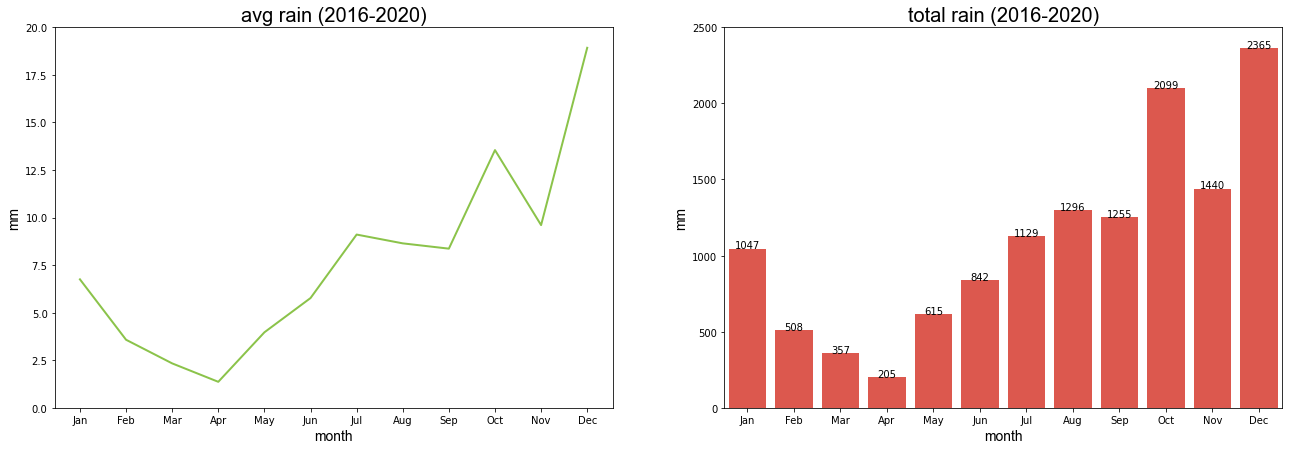

In [103]:
# set a figure and 2 axes for plotting
fig, axs = plt.subplots(ncols=2,figsize=(22,7))

# avg rain
ax1 = sns.lineplot(x='date', y='avg', data=aws_monthly, color='#8BC34A', linewidth=2, ax=axs[0])
axs[0].set_title('avg rain (2016-2020)', fontdict={'fontsize':20,'fontname':'Arial'})
axs[0].set_xlabel('month', fontdict={'fontsize':14,'fontname':'Arial'})
axs[0].set_yticks(np.arange(0,22.5,2.5))
axs[0].set_ylabel('mm', fontdict={'fontsize':14,'fontname':'Arial'})
axs[0].tick_params(axis='both', labelsize=10)

# total rain
ax2 = sns.barplot(x='date', y='total', data=aws_monthly, color='#F44336', linewidth=2, ax=axs[1])
axs[1].set_title('total rain (2016-2020)', fontdict={'fontsize':20,'fontname':'Arial'})
axs[1].set_xlabel('month', fontdict={'fontsize':14,'fontname':'Arial'})
axs[1].set_yticks(np.arange(0,3000,500))
axs[1].set_ylabel('mm', fontdict={'fontsize':14,'fontname':'Arial'})
axs[1].tick_params(axis='both', labelsize=10)
show_values_on_bars(axs[1], orient='v', num=1)

plt.show()

##### _**Yearly Average+Total**_

In [104]:
aws_yearly_avg = aws.groupby([aws.date.dt.year]).mean().reset_index()
aws_yearly_total = aws.groupby([aws.date.dt.year]).sum().reset_index()

In [105]:
aws_yearly = pd.merge(aws_yearly_avg,aws_yearly_total, on='date')
aws_yearly.rename(
    columns={'rain_x':'avg','rain_y':'total'},inplace=True
)
#aws_yearly.to_csv('aws_yearly.csv',index=False)

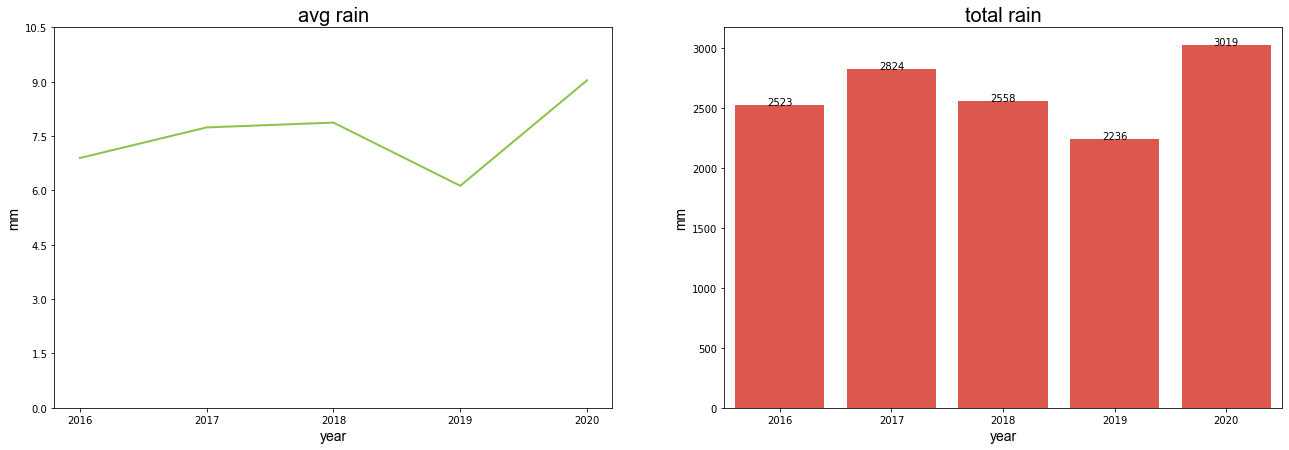

In [106]:
# set a figure and 2 axes for plotting
fig, axs = plt.subplots(ncols=2,figsize=(22,7))

# avg rain
ax3 = sns.lineplot(x='date', y='avg', data=aws_yearly, color='#8BC34A', linewidth=2, ax=axs[0])
axs[0].set_title('avg rain', fontdict={'fontsize':20,'fontname':'Arial'})
axs[0].set_xlabel('year', fontdict={'fontsize':14,'fontname':'Arial'})
axs[0].set_xticks(np.arange(2016,2021,1))
axs[0].set_yticks(np.arange(0,11,1.5))
axs[0].set_ylabel('mm', fontdict={'fontsize':14,'fontname':'Arial'})
axs[0].tick_params(axis='both', labelsize=10)

# total rain
ax4 = sns.barplot(x='date', y='total', data=aws_yearly, color='#F44336', linewidth=2, ax=axs[1])
axs[1].set_title('total rain', fontdict={'fontsize':20,'fontname':'Arial'})
axs[1].set_xlabel('year', fontdict={'fontsize':14,'fontname':'Arial'})
#axs[1].set_yticks(np.arange(0,3000,500))
axs[1].set_ylabel('mm', fontdict={'fontsize':14,'fontname':'Arial'})
axs[1].tick_params(axis='both', labelsize=10)
show_values_on_bars(axs[1], orient='v', num=1)

plt.show()

### _**Project SARAi (Comparison dataset)**_

In [107]:
# list columns for use
columns = ['Date', 'Time', 'Rain', 'Rain Rate', 'Soil 1 Moist', 'Soil 2 Moist', 'Soil 3 Moist', 'Soil 4 Moist']

# read data & remove column name with trailing spaces/replace with _
sarai = pd.read_csv('data/SARAI_BUCAF_2016-2020_as_of_12162020.csv', usecols=columns)
sarai.columns = sarai.columns.str.rstrip().str.replace(' ', '_')
sarai.rename(
    columns={'Rain':'Rain_Rate','Rain_Rate':'Rain'},
    inplace=True
)
sarai.head()

c:\Users\zyrvs\Desktop\thesis_output\venv\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (34,35,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Date,Time,Rain_Rate,Rain,Soil_1_Moist,Soil_2_Moist,Soil_3_Moist,Soil_4_Moist
0,04/21/16,11:00 AM,0.00,0.0,---,---,---,---
1,04/21/16,11:15 AM,0.25,0.0,---,---,---,---
2,04/21/16,11:30 AM,0.00,0.0,---,---,---,---
3,04/21/16,11:45 AM,0.00,0.0,---,---,---,---
4,04/21/16,12:00 PM,0.00,0.0,---,---,---,---


In [108]:
# change date column to datetime object
sarai['Date'] = pd.to_datetime(sarai['Date'], yearfirst=True)

# filter year to 2020 and reassign to dataframe
#df = df[df['Date'].dt.year == 2020]

# copy reading df to working df to avoid SettingWithCopyWarning Error
#df1620 = df.copy()

# change soil object to the proper data type, fill parsing errors with NaN values
sarai['Soil_1_Moist'] = pd.to_numeric(sarai.Soil_1_Moist, errors='coerce')
sarai['Soil_2_Moist'] = pd.to_numeric(sarai.Soil_2_Moist, errors='coerce')
sarai['Soil_3_Moist'] = pd.to_numeric(sarai.Soil_3_Moist, errors='coerce')
sarai['Soil_4_Moist'] = pd.to_numeric(sarai.Soil_4_Moist, errors='coerce')

##### _**per day DataFrame**_

In [109]:
sarai_per_day = sarai.groupby(sarai.Date.dt.strftime('%m-%d-%Y')).mean().reset_index()
sarai_per_day.Date = pd.to_datetime(sarai_per_day.Date, yearfirst=True)
sarai_per_day = sarai_per_day.sort_values(by='Date').reset_index()
sarai_per_day.drop('index', axis=1, inplace=True)
sarai_per_day['Year'] = sarai_per_day.Date.dt.year
sarai_per_day['Month'] = sarai_per_day.Date.dt.strftime('%b')
sarai_per_day

,Date,Rain_Rate,Rain,Soil_1_Moist,Soil_2_Moist,Soil_3_Moist,Soil_4_Moist,Year,Month
0,2016-04-21,0.004808,0.000000,NaN,NaN,NaN,NaN,2016,Apr
1,2016-04-22,0.000000,0.000000,NaN,NaN,NaN,NaN,2016,Apr
2,2016-04-23,0.000000,0.000000,NaN,NaN,NaN,NaN,2016,Apr
3,2016-04-24,0.000000,0.000000,NaN,NaN,NaN,NaN,2016,Apr
4,2016-04-25,0.000000,0.000000,NaN,NaN,NaN,NaN,2016,Apr
...,...,...,...,...,...,...,...,...,...
1400,2020-12-12,0.000000,0.000000,0.0,0.0,0.0,33.023810,2020,Dec
1401,2020-12-13,0.002604,0.000000,0.0,0.0,0.0,36.850000,2020,Dec
1402,2020-12-14,0.013229,0.153125,0.0,0.0,0.0,41.878049,2020,Dec
1403,2020-12-15,0.005208,0.000000,0.0,0.0,0.0,46.657143,2020,Dec


##### _**Avg yearly-monthly**_

In [110]:
# groupby month and aggregate by the mean/reset index to make the date as a column
sarai_monthly_avg = sarai.groupby(sarai.Date.dt.month).mean().reset_index()
sarai_monthly_avg.Date = pd.Series(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
sarai_yearly_avg = sarai.groupby(sarai.Date.dt.year).mean().reset_index()

##### _**Total yearly-monthly**_

In [111]:
# groupby month and aggregate by the sum/reset index to make the date as a column
sarai_monthly_total = sarai.groupby(sarai.Date.dt.month).sum().reset_index()
sarai_monthly_total.Date = pd.Series(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
sarai_yearly_total = sarai.groupby(sarai.Date.dt.year).sum().reset_index()

In [112]:
# SARAi-month

sarai_month = pd.merge(sarai_monthly_avg, sarai_monthly_total,on="Date")
sarai_month.rename(
    columns={'Rain_Rate_x':'rain_rate_avg', 'Rain_x':'rain_avg', 'Soil_1_Moist_x':'soil1_moist_avg',
    'Soil_2_Moist_x':'soil2_moist_avg', 'Soil_3_Moist_x':'soil3_moist_avg', 'Soil_4_Moist_x':'soil4_moist_avg',
    'Rain_Rate_y':'rain_rate_total', 'Rain_y':'rain_total', 'Soil_1_Moist_y':'soil1_moist_total',
    'Soil_2_Moist_y':'soil2_moist_total', 'Soil_3_Moist_y':'soil3_moist_total', 'Soil_4_Moist_y':'soil4_moist_total'
    },inplace=True
)
sarai_month = sarai_month.round({"rain_rate_avg":2, "rain_avg":2, "soil1_moist_avg":2, "soil2_moist_avg":2, "soil3_moist_avg":2,
"soil4_moist_avg":2, "rain_rate_total":0, "rain_total":0, "soil1_moist_total":0, "soil2_moist_total":0, "soil3_moist_total":0,
"soil4_moist_total":0})
#sarai_month.to_csv('SARAi_month.csv', index=False)

In [113]:
# SARAi-year

sarai_year = pd.merge(sarai_yearly_avg, sarai_yearly_total, on='Date')
sarai_year.rename(
    columns={'Rain_Rate_x':'rain_rate_avg', 'Rain_x':'rain_avg', 'Soil_1_Moist_x':'soil1_moist_avg',
    'Soil_2_Moist_x':'soil2_moist_avg', 'Soil_3_Moist_x':'soil3_moist_avg', 'Soil_4_Moist_x':'soil4_moist_avg',
    'Rain_Rate_y':'rain_rate_total', 'Rain_y':'rain_total', 'Soil_1_Moist_y':'soil1_moist_total',
    'Soil_2_Moist_y':'soil2_moist_total', 'Soil_3_Moist_y':'soil3_moist_total', 'Soil_4_Moist_y':'soil4_moist_total'
    },inplace=True
)
sarai_year = sarai_year.round({"rain_rate_avg":2, "rain_avg":2, "soil1_moist_avg":2, "soil2_moist_avg":2, "soil3_moist_avg":2,
"soil4_moist_avg":2, "rain_rate_total":0, "rain_total":0, "soil1_moist_total":0, "soil2_moist_total":0, "soil3_moist_total":0,
"soil4_moist_total":0})
#df_sarai_year.to_csv('SARAi_year.csv', index=False)

In [114]:
# add year and month column for hue parameter in regression plots
sarai['Year'] = sarai.Date.dt.year
sarai['Month'] = sarai.Date.dt.strftime('%b')

##### _**Visualización**_

##### _**Avg rain vs rain rate (month)**_

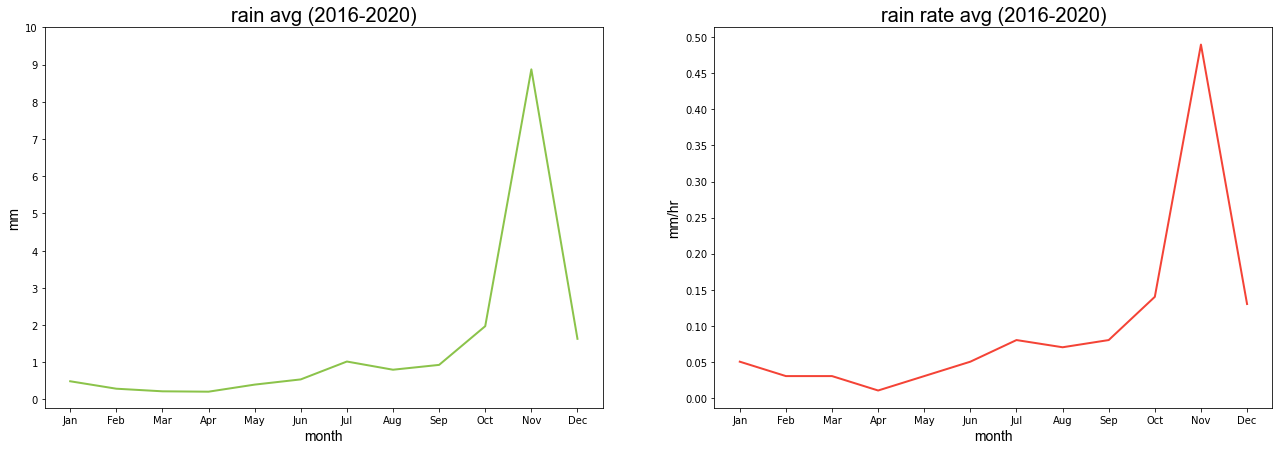

In [115]:
# set a figure and 2 axes for plotting
fig, axs = plt.subplots(ncols=2,figsize=(22,7))

# avg rain
ax1 = sns.lineplot(x='Date', y='rain_avg', data=sarai_month, color='#8BC34A', linewidth=2, ax=axs[0])
axs[0].set_title('rain avg (2016-2020)', fontdict={'fontsize':20,'fontname':'Arial'})
axs[0].set_xlabel('month', fontdict={'fontsize':14,'fontname':'Arial'})
axs[0].set_yticks(np.arange(0,11,1))
axs[0].set_ylabel('mm', fontdict={'fontsize':14,'fontname':'Arial'})
axs[0].tick_params(axis='both', labelsize=10)

# avg rain rate
ax2 = sns.lineplot(x='Date', y='rain_rate_avg', data=sarai_month, color='#F44336', linewidth=2, ax=axs[1])
axs[1].set_title('rain rate avg (2016-2020)', fontdict={'fontsize':20,'fontname':'Arial'})
axs[1].set_xlabel('month', fontdict={'fontsize':14,'fontname':'Arial'})
axs[1].set_yticks(np.arange(0,0.55,0.05))
axs[1].set_ylabel('mm/hr', fontdict={'fontsize':14,'fontname':'Arial'})
axs[1].tick_params(axis='both', labelsize=10)

plt.show()

##### _**Total rain (month)**_

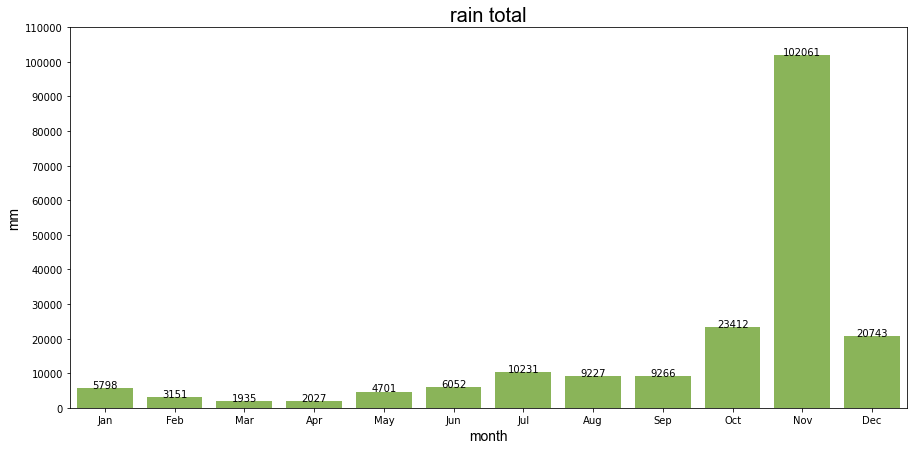

In [116]:
# set a figure and 2 axes for plotting
fig, axs = plt.subplots(figsize=(15,7))

# total rain
ax = sns.barplot(x='Date', y='rain_total', data=sarai_month, color='#8BC34A', ax=axs)
ax.set_title('rain total', fontdict={'fontsize':20,'fontname':'Arial'})
ax.set_xlabel('month', fontdict={'fontsize':14,'fontname':'Arial'})
ax.set_yticks(np.arange(0,120000,10000))
ax.set_ylabel('mm', fontdict={'fontsize':14,'fontname':'Arial'})
ax.tick_params(axis='both', labelsize=10)
show_values_on_bars(axs, orient='v', num=0)

plt.show()

##### _**Avg rain vs rain rate (year)**_

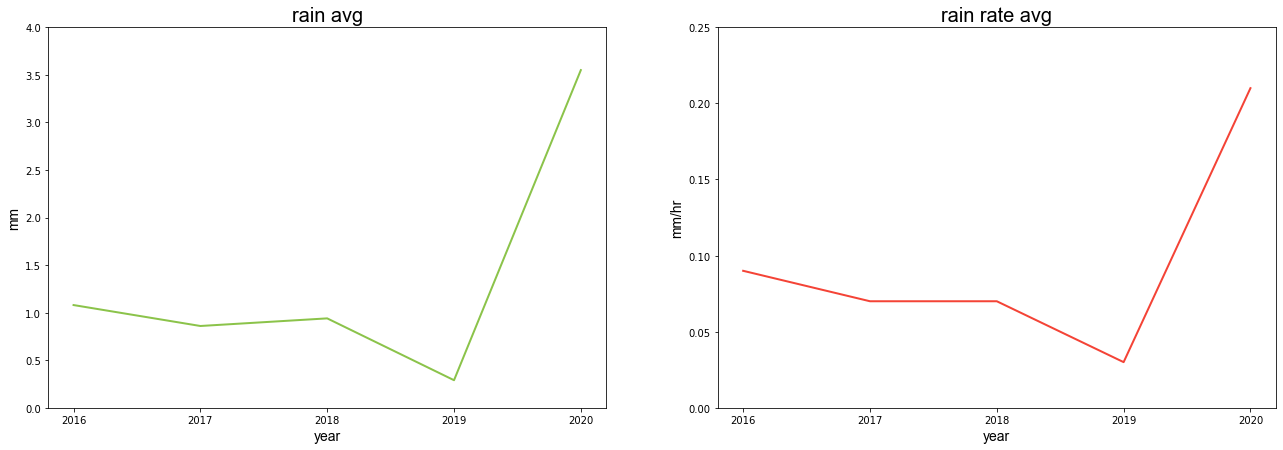

In [117]:
# set a figure and 2 axes for plotting
fig, axs = plt.subplots(ncols=2,figsize=(22,7))

# avg rain
ax1 = sns.lineplot(x='Date', y='rain_avg', data=sarai_year, color='#8BC34A', linewidth=2, ax=axs[0])
axs[0].set_title('rain avg', fontdict={'fontsize':20,'fontname':'Arial'})
axs[0].set_xlabel('year', fontdict={'fontsize':14,'fontname':'Arial'})
axs[0].set_xticks(np.arange(2016,2021,1))
axs[0].set_yticks(np.arange(0,4.5,0.5))
axs[0].set_ylabel('mm', fontdict={'fontsize':14,'fontname':'Arial'})
axs[0].tick_params(axis='both', labelsize=10)

# avg rain rate
ax2 = sns.lineplot(x='Date', y='rain_rate_avg', data=sarai_year, color='#F44336', linewidth=2, ax=axs[1])
axs[1].set_title('rain rate avg', fontdict={'fontsize':20,'fontname':'Arial'})
axs[1].set_xlabel('year', fontdict={'fontsize':14,'fontname':'Arial'})
axs[1].set_xticks(np.arange(2016,2021,1))
axs[1].set_yticks(np.arange(0,0.3,0.05))
axs[1].set_ylabel('mm/hr', fontdict={'fontsize':14,'fontname':'Arial'})
axs[1].tick_params(axis='both', labelsize=10)

plt.show()

##### _**Total rain (year)**_

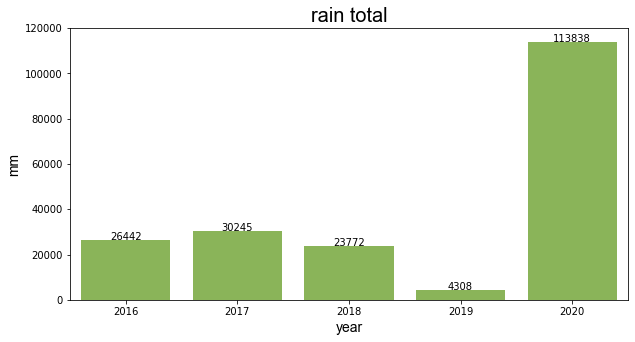

In [118]:
# set a figure and 2 axes for plotting
fig, axs = plt.subplots(figsize=(10,5))

# total rain
ax = sns.barplot(x='Date', y='rain_total', data=sarai_year, color='#8BC34A', ax=axs)
ax.set_title('rain total', fontdict={'fontsize':20,'fontname':'Arial'})
ax.set_xlabel('year', fontdict={'fontsize':14,'fontname':'Arial'})
ax.set_yticks(np.arange(0,140000,20000))
ax.set_ylabel('mm', fontdict={'fontsize':14,'fontname':'Arial'})
ax.tick_params(axis='both', labelsize=10)
show_values_on_bars(axs, orient='v',num=0)

plt.show()

##### _**Avg soil 1-4 moisture (month)**_

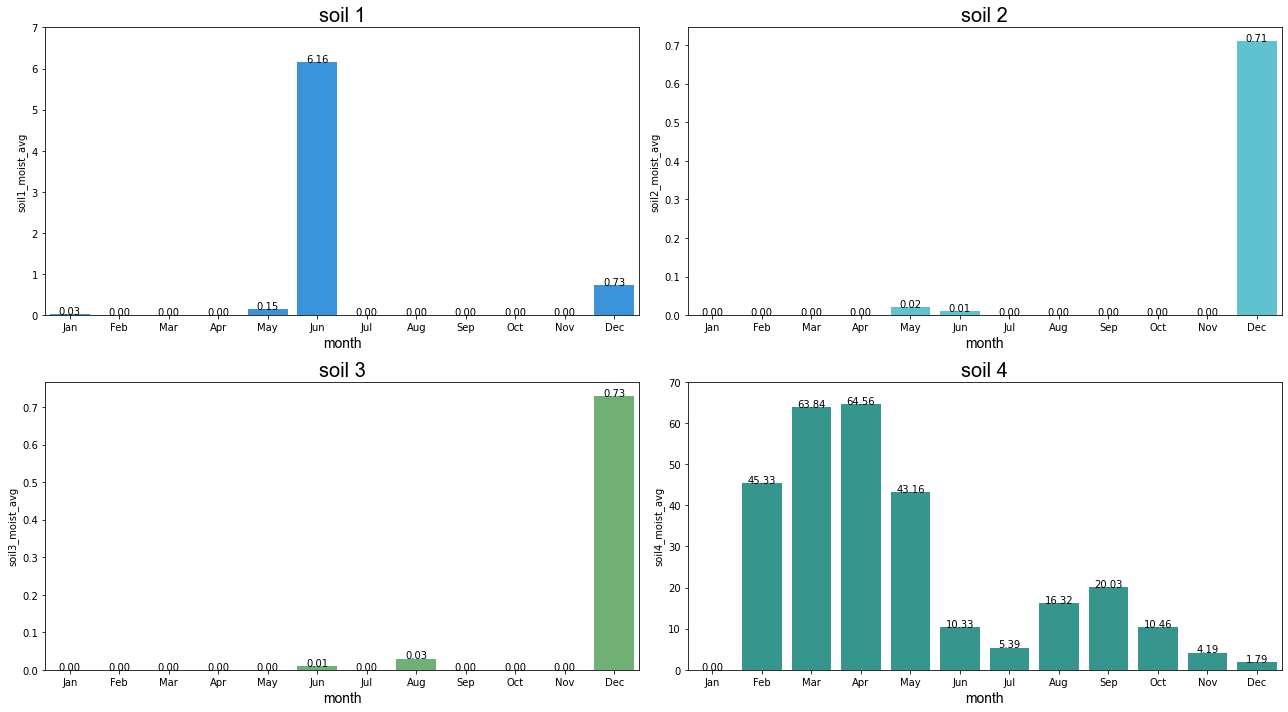

In [119]:
fig, axs = plt.subplots(2,2,figsize=(18,10))

# soil_1
axs1 = sns.barplot(x='Date', y='soil1_moist_avg', data=sarai_month, color='#2196F3', ax=axs[0,0])
axs[0,0].set_title('soil 1', fontdict={'fontsize':20,'fontname':'Arial'})
axs[0,0].set_xlabel('month', fontdict={'fontsize':14,'fontname':'Arial'})
axs[0,0].set_yticks(np.arange(0,8,1))
#axs[0,0].set_ylabel('cm3/cm3', fontdict={'fontsize':14,'fontname':'Arial'})
axs[0,0].tick_params(axis='both', labelsize=10)
#show_values(ax1, orient='v', space=.02)
show_values_on_bars(axs[0,0], num=2)

# soil_2
axs2 = sns.barplot(x='Date', y='soil2_moist_avg', data=sarai_month, color='#4DD0E1', ax=axs[0,1])
axs[0,1].set_title('soil 2', fontdict={'fontsize':20,'fontname':'Arial'})
axs[0,1].set_xlabel('month', fontdict={'fontsize':14,'fontname':'Arial'})
axs[0,1].set_yticks(np.arange(0,0.8,0.1))
#axs[0,1].set_ylabel('cm3/cm3', fontdict={'fontsize':14,'fontname':'Arial'})
axs[0,1].tick_params(axis='both', labelsize=10)
#show_values(axs1, orient='v', space=.02)
show_values_on_bars(axs[0,1], num=2)

# soil_3
axs3 = sns.barplot(x='Date', y='soil3_moist_avg', data=sarai_month, color='#66BB6A', ax=axs[1,0])
axs[1,0].set_title('soil 3', fontdict={'fontsize':20,'fontname':'Arial'})
axs[1,0].set_xlabel('month', fontdict={'fontsize':14,'fontname':'Arial'})
#axs[1,0].set_yticks(np.arange(0,0.1,0.025))
#axs[1,0].set_ylabel('cm3/cm3', fontdict={'fontsize':14,'fontname':'Arial'})
axs[1,0].tick_params(axis='both', labelsize=10)
#show_values(ax1, orient='v', space=.02)
show_values_on_bars(axs[1,0], num=2)

# soil_4
axs4 = sns.barplot(x='Date', y='soil4_moist_avg', data=sarai_month, color='#26A69A', ax=axs[1,1])
axs[1,1].set_title('soil 4', fontdict={'fontsize':20,'fontname':'Arial'})
axs[1,1].set_xlabel('month', fontdict={'fontsize':14,'fontname':'Arial'})
axs[1,1].set_yticks(np.arange(0,80,10))
#axs[1,1].set_ylabel('cm3/cm3', fontdict={'fontsize':14,'fontname':'Arial'})
axs[1,1].tick_params(axis='both', labelsize=10)
show_values_on_bars(axs[1,1], num=2)

fig.tight_layout()
plt.show()

##### _**Total soil 1-4 moisture (month)**_

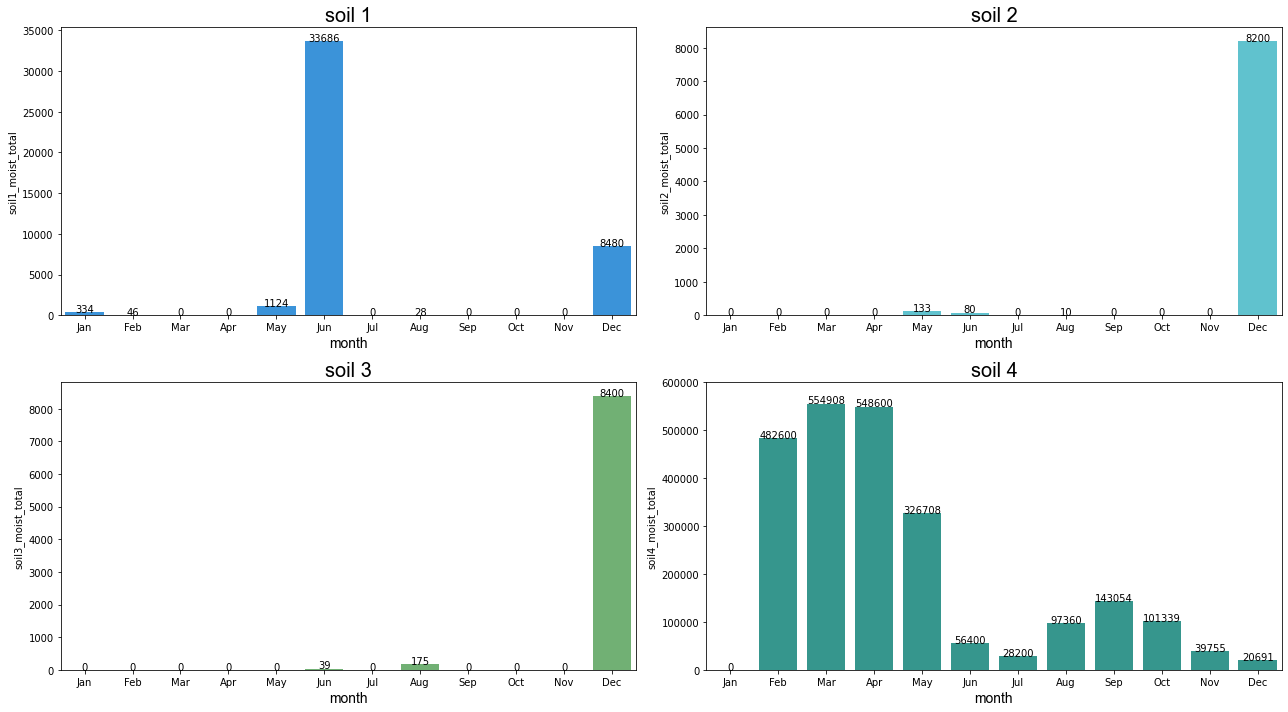

In [120]:
fig, axs = plt.subplots(2,2,figsize=(18,10))

# soil_1
axs1 = sns.barplot(x='Date', y='soil1_moist_total', data=sarai_month, color='#2196F3', ax=axs[0,0])
axs[0,0].set_title('soil 1', fontdict={'fontsize':20,'fontname':'Arial'})
axs[0,0].set_xlabel('month', fontdict={'fontsize':14,'fontname':'Arial'})
#axs[0,0].set_yticks(np.arange(0,8,1))
#axs[0,0].set_ylabel('cm3/cm3', fontdict={'fontsize':14,'fontname':'Arial'})
axs[0,0].tick_params(axis='both', labelsize=10)
show_values_on_bars(axs[0,0], num=0)

# soil_2
axs2 = sns.barplot(x='Date', y='soil2_moist_total', data=sarai_month, color='#4DD0E1', ax=axs[0,1])
axs[0,1].set_title('soil 2', fontdict={'fontsize':20,'fontname':'Arial'})
axs[0,1].set_xlabel('month', fontdict={'fontsize':14,'fontname':'Arial'})
#axs[0,1].set_yticks(np.arange(0,0.8,0.1))
#axs[0,1].set_ylabel('cm3/cm3', fontdict={'fontsize':14,'fontname':'Arial'})
axs[0,1].tick_params(axis='both', labelsize=10)
show_values_on_bars(axs[0,1], num=0)

# soil_3
axs3 = sns.barplot(x='Date', y='soil3_moist_total', data=sarai_month, color='#66BB6A', ax=axs[1,0])
axs[1,0].set_title('soil 3', fontdict={'fontsize':20,'fontname':'Arial'})
axs[1,0].set_xlabel('month', fontdict={'fontsize':14,'fontname':'Arial'})
#axs[1,0].set_yticks(np.arange(0,0.1,0.025))
#axs[1,0].set_ylabel('cm3/cm3', fontdict={'fontsize':14,'fontname':'Arial'})
axs[1,0].tick_params(axis='both', labelsize=10)
show_values_on_bars(axs[1,0], num=0)

# soil_4
axs4 = sns.barplot(x='Date', y='soil4_moist_total', data=sarai_month, color='#26A69A', ax=axs[1,1])
axs[1,1].set_title('soil 4', fontdict={'fontsize':20,'fontname':'Arial'})
axs[1,1].set_xlabel('month', fontdict={'fontsize':14,'fontname':'Arial'})
axs[1,1].set_yticks(np.arange(0,700000,100000))
#axs[1,1].set_ylabel('cm3/cm3', fontdict={'fontsize':14,'fontname':'Arial'})
axs[1,1].tick_params(axis='both', labelsize=10)
show_values_on_bars(axs[1,1], num=0)

fig.tight_layout()
plt.show()

##### _**Avg soil 1-4 moisture (year)**_

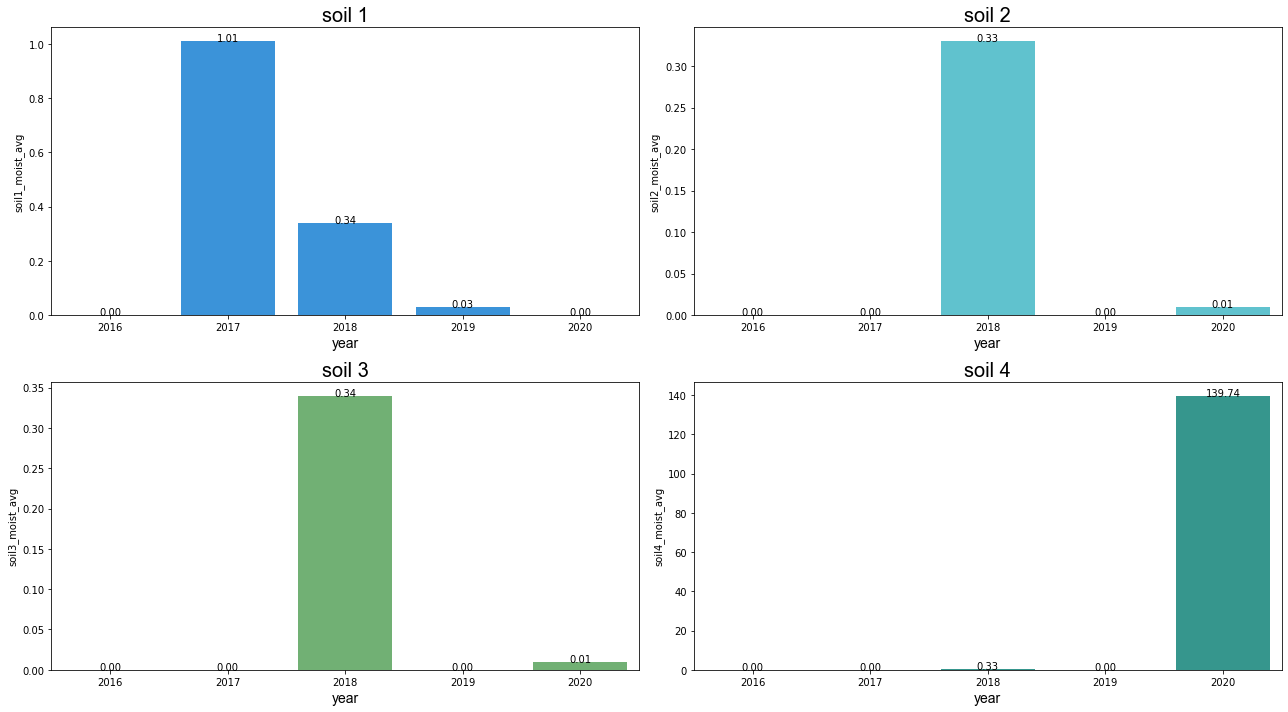

In [121]:
fig, axs = plt.subplots(2,2,figsize=(18,10))

# soil_1
axs1 = sns.barplot(x='Date', y='soil1_moist_avg', data=sarai_year, color='#2196F3', ax=axs[0,0])
axs[0,0].set_title('soil 1', fontdict={'fontsize':20,'fontname':'Arial'})
axs[0,0].set_xlabel('year', fontdict={'fontsize':14,'fontname':'Arial'})
#axs[0,0].set_yticks(np.arange(0,8,1))
#axs[0,0].set_ylabel('cm3/cm3', fontdict={'fontsize':14,'fontname':'Arial'})
axs[0,0].tick_params(axis='both', labelsize=10)
#show_values(ax1, orient='v', space=.02)
show_values_on_bars(axs[0,0], num=2)

# soil_2
axs2 = sns.barplot(x='Date', y='soil2_moist_avg', data=sarai_year, color='#4DD0E1', ax=axs[0,1])
axs[0,1].set_title('soil 2', fontdict={'fontsize':20,'fontname':'Arial'})
axs[0,1].set_xlabel('year', fontdict={'fontsize':14,'fontname':'Arial'})
#axs[0,1].set_yticks(np.arange(0,0.8,0.1))
#axs[0,1].set_ylabel('cm3/cm3', fontdict={'fontsize':14,'fontname':'Arial'})
axs[0,1].tick_params(axis='both', labelsize=10)
#show_values(axs1, orient='v', space=.02)
show_values_on_bars(axs[0,1], num=2)

# soil_3
axs3 = sns.barplot(x='Date', y='soil3_moist_avg', data=sarai_year, color='#66BB6A', ax=axs[1,0])
axs[1,0].set_title('soil 3', fontdict={'fontsize':20,'fontname':'Arial'})
axs[1,0].set_xlabel('year', fontdict={'fontsize':14,'fontname':'Arial'})
#axs[1,0].set_yticks(np.arange(0,0.1,0.025))
#axs[1,0].set_ylabel('cm3/cm3', fontdict={'fontsize':14,'fontname':'Arial'})
axs[1,0].tick_params(axis='both', labelsize=10)
#show_values(ax1, orient='v', space=.02)
show_values_on_bars(axs[1,0], num=2)

# soil_4
axs4 = sns.barplot(x='Date', y='soil4_moist_avg', data=sarai_year, color='#26A69A', ax=axs[1,1])
axs[1,1].set_title('soil 4', fontdict={'fontsize':20,'fontname':'Arial'})
axs[1,1].set_xlabel('year', fontdict={'fontsize':14,'fontname':'Arial'})
#axs[1,1].set_yticks(np.arange(0,80,10))
#axs[1,1].set_ylabel('cm3/cm3', fontdict={'fontsize':14,'fontname':'Arial'})
axs[1,1].tick_params(axis='both', labelsize=10)
show_values_on_bars(axs[1,1], num=2)

fig.tight_layout()
plt.show()

##### _**Total soil 1-4 moisture (year)**_

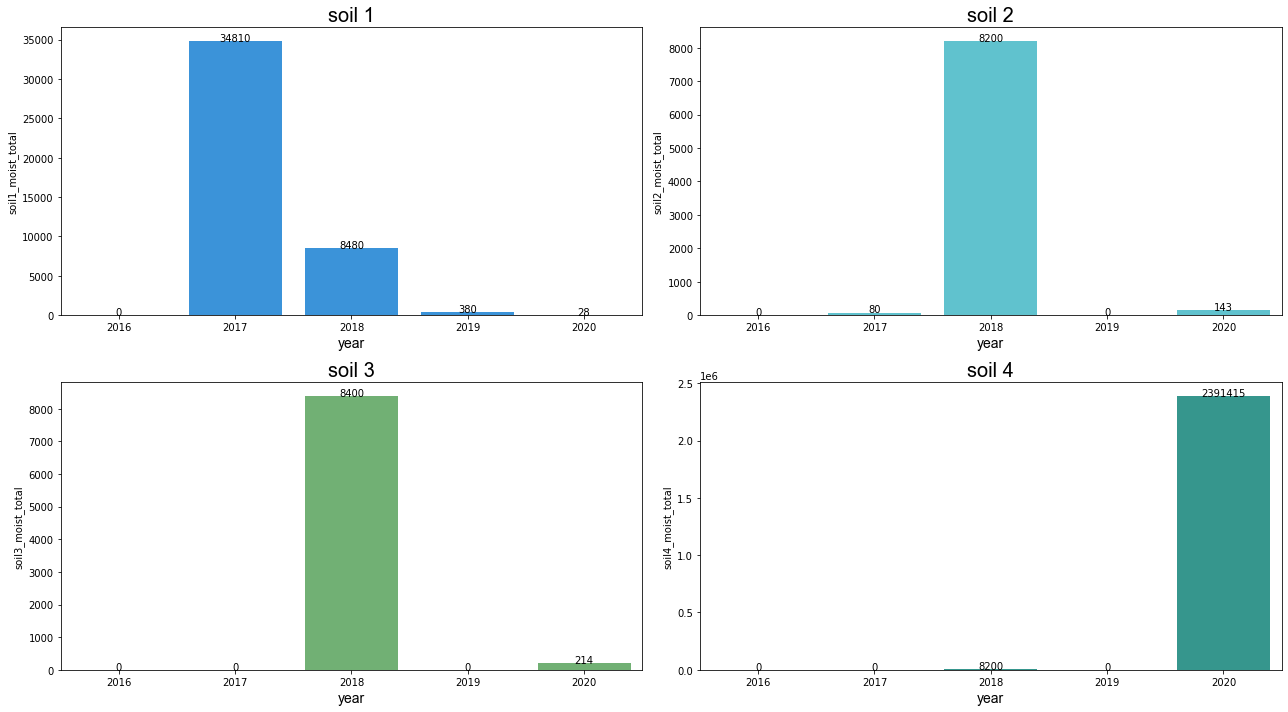

In [122]:
fig, axs = plt.subplots(2,2,figsize=(18,10))

# soil_1
axs1 = sns.barplot(x='Date', y='soil1_moist_total', data=sarai_year, color='#2196F3', ax=axs[0,0])
axs[0,0].set_title('soil 1', fontdict={'fontsize':20,'fontname':'Arial'})
axs[0,0].set_xlabel('year', fontdict={'fontsize':14,'fontname':'Arial'})
#axs[0,0].set_yticks(np.arange(0,8,1))
#axs[0,0].set_ylabel('cm3/cm3', fontdict={'fontsize':14,'fontname':'Arial'})
axs[0,0].tick_params(axis='both', labelsize=10)
show_values_on_bars(axs[0,0], num=0)

# soil_2
axs2 = sns.barplot(x='Date', y='soil2_moist_total', data=sarai_year, color='#4DD0E1', ax=axs[0,1])
axs[0,1].set_title('soil 2', fontdict={'fontsize':20,'fontname':'Arial'})
axs[0,1].set_xlabel('year', fontdict={'fontsize':14,'fontname':'Arial'})
#axs[0,1].set_yticks(np.arange(0,0.8,0.1))
#axs[0,1].set_ylabel('cm3/cm3', fontdict={'fontsize':14,'fontname':'Arial'})
axs[0,1].tick_params(axis='both', labelsize=10)
show_values_on_bars(axs[0,1], num=0)

# soil_3
axs3 = sns.barplot(x='Date', y='soil3_moist_total', data=sarai_year, color='#66BB6A', ax=axs[1,0])
axs[1,0].set_title('soil 3', fontdict={'fontsize':20,'fontname':'Arial'})
axs[1,0].set_xlabel('year', fontdict={'fontsize':14,'fontname':'Arial'})
#axs[1,0].set_yticks(np.arange(0,0.1,0.025))
#axs[1,0].set_ylabel('cm3/cm3', fontdict={'fontsize':14,'fontname':'Arial'})
axs[1,0].tick_params(axis='both', labelsize=10)
show_values_on_bars(axs[1,0], num=0)

# soil_4
axs4 = sns.barplot(x='Date', y='soil4_moist_total', data=sarai_year, color='#26A69A', ax=axs[1,1])
axs[1,1].set_title('soil 4', fontdict={'fontsize':20,'fontname':'Arial'})
axs[1,1].set_xlabel('year', fontdict={'fontsize':14,'fontname':'Arial'})
#axs[1,1].set_yticks(np.arange(0,700000,100000))
#axs[1,1].set_ylabel('cm3/cm3', fontdict={'fontsize':14,'fontname':'Arial'})
axs[1,1].tick_params(axis='both', labelsize=10)
show_values_on_bars(axs[1,1], num=0)

fig.tight_layout()
plt.show()

### _**Regression**_

##### _**SENTINEL-AWS**_

In [123]:
reg_sent_aws = sentinel.groupby([sentinel.Date.dt.strftime('%Y-%m-%d')]).mean().reset_index()
reg_sent_aws.rename(
    columns={'Date':'date'},inplace=True
)
reg_sent_aws.date = pd.to_datetime(reg_sent_aws.date, format='%Y-%m-%d')
sm_aws = pd.merge(reg_sent_aws, aws, how='outer', on=['date']).dropna(axis=0,how='any')

In [124]:
merge16 = sm_aws[sm_aws.Year == 2016].drop(labels=['id'],axis=1)
merge17 = sm_aws[sm_aws.Year == 2017].drop(labels=['id'],axis=1)
merge18 = sm_aws[sm_aws.Year == 2018].drop(labels=['id'],axis=1)
merge19 = sm_aws[sm_aws.Year == 2019].drop(labels=['id'],axis=1)
merge20 = sm_aws[sm_aws.Year == 2020].drop(labels=['id'],axis=1)

merge16['id'] = merge16.date.dt.strftime('%b')
merge17['id'] = merge17.date.dt.strftime('%b')
merge18['id'] = merge18.date.dt.strftime('%b')
merge19['id'] = merge19.date.dt.strftime('%b')
merge20['id'] = merge20.date.dt.strftime('%b')

In [125]:
print('2016: ',np.corrcoef(x=merge16.Soil_Moisture, y=merge16.rain)[0][1])
print('2017: ',np.corrcoef(x=merge17.Soil_Moisture, y=merge17.rain)[0][1])
print('2018: ',np.corrcoef(x=merge18.Soil_Moisture, y=merge18.rain)[0][1])
print('2019: ',np.corrcoef(x=merge19.Soil_Moisture, y=merge19.rain)[0][1])
print('2020: ',np.corrcoef(x=merge20.Soil_Moisture, y=merge20.rain)[0][1])

2016:  0.39112593997594014
2017:  0.26458261160352703
2018:  0.25807455950557534
2019:  0.3392543657040291
2020:  0.23495413511966784


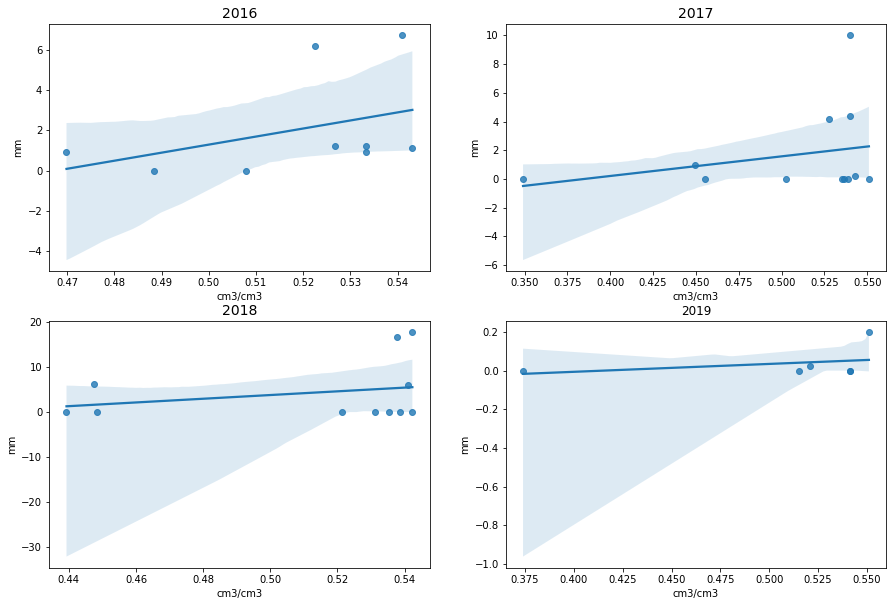

In [126]:
fig, axs = plt.subplots(ncols=2, nrows=2,figsize=(15,10))

axs1 = sns.regplot(data=merge16, x='Soil_Moisture', y='rain',ax=axs[0,0])
axs1.set_title('2016', fontdict={'fontsize':14})
axs1.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
axs1.set_ylabel('mm', fontdict={'fontsize':10})
#axs1.set_yticks(np.arange(0,600,100))
axs1.tick_params(axis='both', labelsize=10)

axs2 = sns.regplot(data=merge17, x='Soil_Moisture', y='rain',ax=axs[0,1])
axs2.set_title('2017', fontdict={'fontsize':14})
axs2.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
axs2.set_ylabel('mm', fontdict={'fontsize':10})
#axs2.set_yticks(np.arange(0,600,100))
axs2.tick_params(axis='both', labelsize=10)

axs3 = sns.regplot(data=merge18, x='Soil_Moisture', y='rain',ax=axs[1,0])
axs3.set_title('2018', fontdict={'fontsize':14})
axs3.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
axs3.set_ylabel('mm', fontdict={'fontsize':10})
#axs3.set_yticks(np.arange(0,600,100))
axs3.tick_params(axis='both', labelsize=10)

axs4 = sns.regplot(data=merge19, x='Soil_Moisture', y='rain',ax=axs[1,1])
axs4.set_title('2019', fontdict={'fontsize':12})
axs4.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
axs4.set_ylabel('mm', fontdict={'fontsize':10})
#axs4.set_yticks(np.arange(0,600,100))
axs4.tick_params(axis='both', labelsize=10)

plt.show()

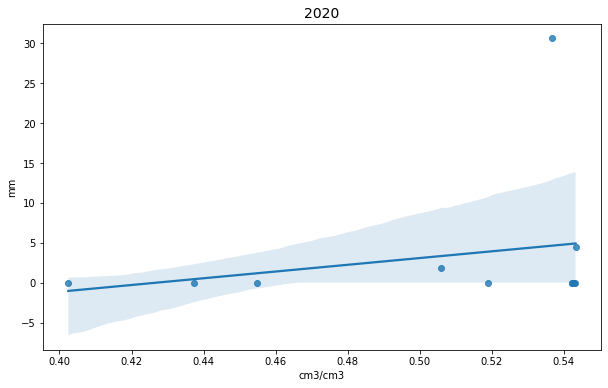

In [127]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.regplot(data=merge20, x='Soil_Moisture', y='rain',ax=ax)
ax.set_title('2020', fontdict={'fontsize':14})
ax.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
ax.set_ylabel('mm', fontdict={'fontsize':10})
#axs4.set_yticks(np.arange(0,600,100))
ax.tick_params(axis='both', labelsize=10)
plt.show()

##### _**SENTINEL-SARAi**_

In [128]:
dfsent= sentinel.groupby([sentinel.Date.dt.strftime('%Y-%m-%d')]).mean().reset_index().drop(labels=['id'],axis=1)
dfsent.rename(
    columns={'date':'Date'},inplace=True
)
dfsent.Date = pd.to_datetime(dfsent.Date, format='%Y-%m-%d')
dfsarai= sarai_per_day.drop(labels=['Soil_1_Moist','Soil_2_Moist','Soil_3_Moist','Soil_4_Moist','Year','Month'],axis=1)
sent_sarai = pd.merge(dfsent,dfsarai, how='outer',on=['Date']).dropna(axis=0,how='any')
sent_sarai['Month'] = sent_sarai.Date.dt.strftime('%b')
#merge_sm_aws = pd.merge(soil_reg, df_aws, how='outer', on=['date']).dropna(axis=0,how='any')

##### _**Corrcoef**_

In [129]:
sent_sarai16 = sent_sarai[sent_sarai.Year == 2016.0]
sent_sarai17 = sent_sarai[sent_sarai.Year == 2017.0]
sent_sarai18 = sent_sarai[sent_sarai.Year == 2018.0]
sent_sarai19 = sent_sarai[sent_sarai.Year == 2019.0]
sent_sarai20 = sent_sarai[sent_sarai.Year == 2020.0]
print('Rain')
print('2016: ',np.corrcoef(x=sent_sarai16.Soil_Moisture, y=sent_sarai16.Rain)[0][1])
print('2017: ',np.corrcoef(x=sent_sarai17.Soil_Moisture, y=sent_sarai17.Rain)[0][1])
print('2018: ',np.corrcoef(x=sent_sarai18.Soil_Moisture, y=sent_sarai18.Rain)[0][1])
print('2019: ',np.corrcoef(x=sent_sarai19.Soil_Moisture, y=sent_sarai19.Rain)[0][1])
print('2020: ',np.corrcoef(x=sent_sarai20.Soil_Moisture, y=sent_sarai20.Rain)[0][1])
print('\n')
print('Rain-Rate')
print('2016: ',np.corrcoef(x=sent_sarai16.Soil_Moisture, y=sent_sarai16.Rain_Rate)[0][1])
print('2017: ',np.corrcoef(x=sent_sarai17.Soil_Moisture, y=sent_sarai17.Rain_Rate)[0][1])
print('2018: ',np.corrcoef(x=sent_sarai18.Soil_Moisture, y=sent_sarai18.Rain_Rate)[0][1])
print('2019: ',np.corrcoef(x=sent_sarai19.Soil_Moisture, y=sent_sarai19.Rain_Rate)[0][1])
print('2020: ',np.corrcoef(x=sent_sarai20.Soil_Moisture, y=sent_sarai20.Rain_Rate)[0][1])

Rain
2016:  -0.04505863597578825
2017:  0.26981516842504444
2018:  -0.1570984859376146
2019:  -0.97907427537451
2020:  0.26016795345904314


Rain-Rate
2016:  0.2684109913848446
2017:  0.2825133039262718
2018:  0.1273179268552755
2019:  -0.9711069278468126
2020:  0.18550868911729745


##### _**Soil Moisture-Rain**_

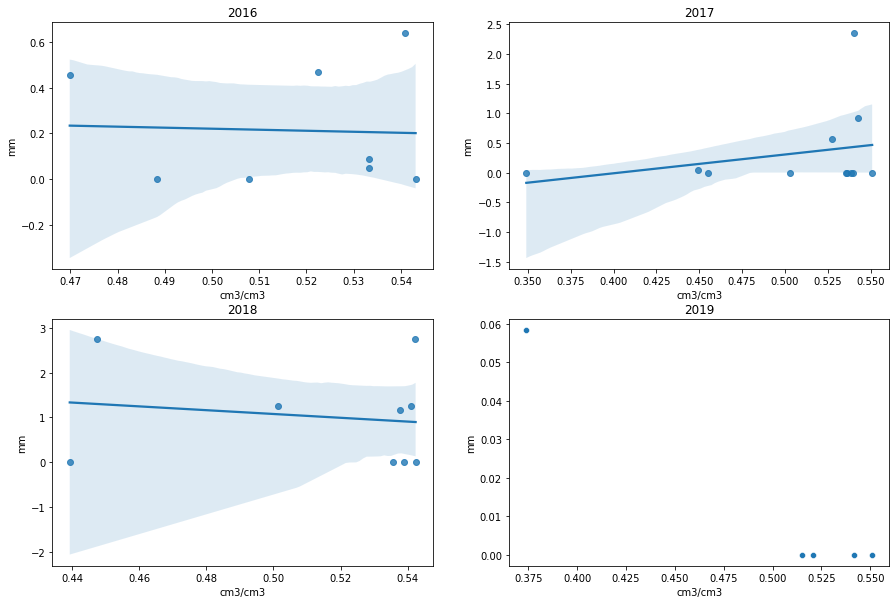

In [130]:
fig, axs = plt.subplots(ncols=2, nrows=2,figsize=(15,10))

axs1 = sns.regplot(data=sent_sarai16, x='Soil_Moisture', y='Rain',ax=axs[0,0])
axs1.set_title('2016', fontdict={'fontsize':12})
axs1.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
axs1.set_ylabel('mm', fontdict={'fontsize':10})
#axs1.set_yticks(np.arange(0,600,100))
axs1.tick_params(axis='both', labelsize=10)

axs2 = sns.regplot(data=sent_sarai17, x='Soil_Moisture', y='Rain',ax=axs[0,1])
axs2.set_title('2017', fontdict={'fontsize':12})
axs2.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
axs2.set_ylabel('mm', fontdict={'fontsize':10})
#axs2.set_yticks(np.arange(0,600,100))
axs2.tick_params(axis='both', labelsize=10)

axs3 = sns.regplot(data=sent_sarai18, x='Soil_Moisture', y='Rain',ax=axs[1,0])
axs3.set_title('2018', fontdict={'fontsize':12})
axs3.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
axs3.set_ylabel('mm', fontdict={'fontsize':10})
#axs3.set_yticks(np.arange(0,600,100))
axs3.tick_params(axis='both', labelsize=10)

axs4 = sns.scatterplot(data=sent_sarai19, x='Soil_Moisture', y='Rain',ax=axs[1,1])
axs4.set_title('2019', fontdict={'fontsize':12})
axs4.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
axs4.set_ylabel('mm', fontdict={'fontsize':10})
#axs4.set_yticks(np.arange(0,600,100))
axs4.tick_params(axis='both', labelsize=10)

plt.show()

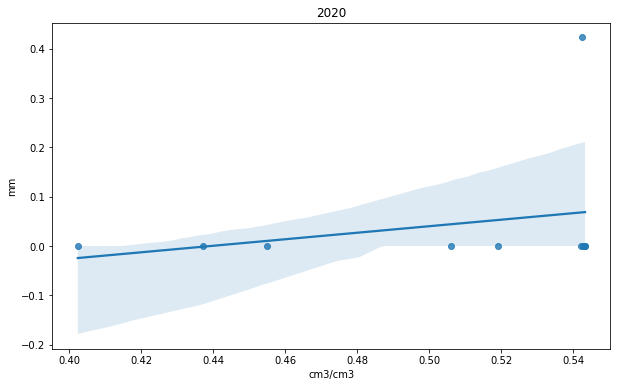

In [131]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.regplot(data=sent_sarai20, x='Soil_Moisture', y='Rain',ax=ax)
ax.set_title('2020', fontdict={'fontsize':12})
ax.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
ax.set_ylabel('mm', fontdict={'fontsize':10})
#axs4.set_yticks(np.arange(0,600,100))
ax.tick_params(axis='both', labelsize=10)
plt.show()

##### _**Soil Moisture-Rain Rate**_

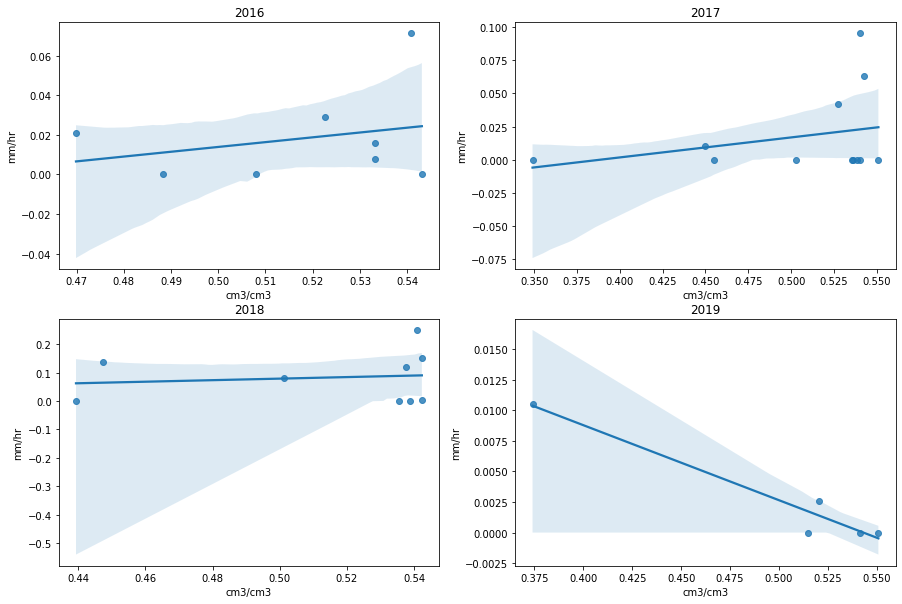

In [132]:
fig, axs = plt.subplots(ncols=2, nrows=2,figsize=(15,10))

axs1 = sns.regplot(data=sent_sarai16, x='Soil_Moisture', y='Rain_Rate',ax=axs[0,0])
axs1.set_title('2016', fontdict={'fontsize':12})
axs1.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
axs1.set_ylabel('mm/hr', fontdict={'fontsize':10})
#axs1.set_yticks(np.arange(0,600,100))
axs1.tick_params(axis='both', labelsize=10)

axs2 = sns.regplot(data=sent_sarai17, x='Soil_Moisture', y='Rain_Rate',ax=axs[0,1])
axs2.set_title('2017', fontdict={'fontsize':12})
axs2.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
axs2.set_ylabel('mm/hr', fontdict={'fontsize':10})
#axs2.set_yticks(np.arange(0,600,100))
axs2.tick_params(axis='both', labelsize=10)

axs3 = sns.regplot(data=sent_sarai18, x='Soil_Moisture', y='Rain_Rate',ax=axs[1,0])
axs3.set_title('2018', fontdict={'fontsize':12})
axs3.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
axs3.set_ylabel('mm/hr', fontdict={'fontsize':10})
#axs3.set_yticks(np.arange(0,600,100))
axs3.tick_params(axis='both', labelsize=10)

axs4 = sns.regplot(data=sent_sarai19, x='Soil_Moisture', y='Rain_Rate',ax=axs[1,1])
axs4.set_title('2019', fontdict={'fontsize':12})
axs4.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
axs4.set_ylabel('mm/hr', fontdict={'fontsize':10})
#axs4.set_yticks(np.arange(0,600,100))
axs4.tick_params(axis='both', labelsize=10)

plt.show()

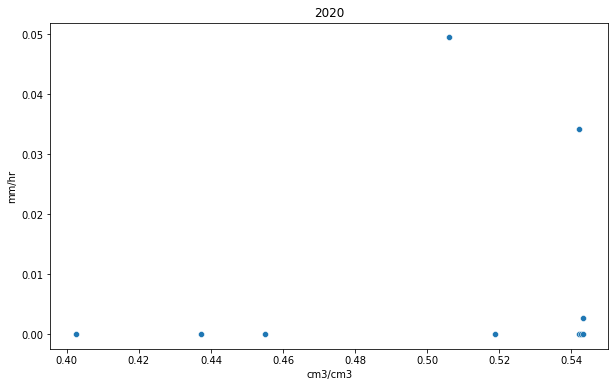

In [133]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.scatterplot(data=sent_sarai20, x='Soil_Moisture', y='Rain_Rate',ax=ax)
ax.set_title('2020', fontdict={'fontsize':12})
ax.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
ax.set_ylabel('mm/hr', fontdict={'fontsize':10})
#axs4.set_yticks(np.arange(0,600,100))
ax.tick_params(axis='both', labelsize=10)
plt.show()

##### _**SARAi**_

##### _**Corrcoef**_

In [134]:
sarai16 = sarai[sarai.Date.dt.year == 2016].dropna(axis=0, how='any')
sarai17 = sarai[sarai.Date.dt.year == 2017].dropna(axis=0, how='any')
sarai18 = sarai[sarai.Date.dt.year == 2018].dropna(axis=0, how='any')
sarai19 = sarai[sarai.Date.dt.year == 2019].dropna(axis=0, how='any')
sarai20 = sarai[sarai.Date.dt.year == 2020].dropna(axis=0, how='any')

print('Rain-Soil_1_Moist')
print('2016: ',np.corrcoef(x=sarai16.Soil_1_Moist, y=sarai16.Rain)[0][1])
print('2017: ',np.corrcoef(x=sarai17.Soil_1_Moist, y=sarai17.Rain)[0][1])
print('2018: ',np.corrcoef(x=sarai18.Soil_1_Moist, y=sarai18.Rain)[0][1])
print('2019: ',np.corrcoef(x=sarai19.Soil_1_Moist, y=sarai19.Rain)[0][1])
print('2020: ',np.corrcoef(x=sarai20.Soil_1_Moist, y=sarai20.Rain)[0][1])
print('Rain-Soil_2_Moist')
print('2016: ',np.corrcoef(x=sarai16.Soil_2_Moist, y=sarai16.Rain)[0][1])
print('2017: ',np.corrcoef(x=sarai17.Soil_2_Moist, y=sarai17.Rain)[0][1])
print('2018: ',np.corrcoef(x=sarai18.Soil_2_Moist, y=sarai18.Rain)[0][1])
print('2019: ',np.corrcoef(x=sarai19.Soil_2_Moist, y=sarai19.Rain)[0][1])
print('2020: ',np.corrcoef(x=sarai20.Soil_2_Moist, y=sarai20.Rain)[0][1])
print('Rain-Soil_3_Moist')
print('2016: ',np.corrcoef(x=sarai16.Soil_3_Moist, y=sarai16.Rain)[0][1])
print('2017: ',np.corrcoef(x=sarai17.Soil_3_Moist, y=sarai17.Rain)[0][1])
print('2018: ',np.corrcoef(x=sarai18.Soil_3_Moist, y=sarai18.Rain)[0][1])
print('2019: ',np.corrcoef(x=sarai19.Soil_3_Moist, y=sarai19.Rain)[0][1])
print('2020: ',np.corrcoef(x=sarai20.Soil_3_Moist, y=sarai20.Rain)[0][1])
print('Rain-Soil_4_Moist')
print('2016: ',np.corrcoef(x=sarai16.Soil_4_Moist, y=sarai16.Rain)[0][1])
print('2017: ',np.corrcoef(x=sarai17.Soil_4_Moist, y=sarai17.Rain)[0][1])
print('2018: ',np.corrcoef(x=sarai18.Soil_4_Moist, y=sarai18.Rain)[0][1])
print('2019: ',np.corrcoef(x=sarai19.Soil_4_Moist, y=sarai19.Rain)[0][1])
print('2020: ',np.corrcoef(x=sarai20.Soil_4_Moist, y=sarai20.Rain)[0][1])

Rain-Soil_1_Moist
2016:  nan
2017:  -0.015526947287402032
2018:  -0.00523657677575045
2019:  -0.012251788709343403
2020:  -0.001651145860099815
Rain-Soil_2_Moist
2016:  nan
2017:  0.07817590831278916
2018:  -0.005205999381199102
2019:  nan
2020:  -0.0017444866544279853
Rain-Soil_3_Moist
2016:  nan
2017:  nan
2018:  -0.005205999381199102
2019:  nan
2020:  -0.0034905845534833686
Rain-Soil_4_Moist
2016:  nan
2017:  nan
2018:  -0.005205999381199102
2019:  nan
2020:  -0.045045137454876746


c:\Users\zyrvs\Desktop\thesis_output\venv\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\Users\zyrvs\Desktop\thesis_output\venv\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [135]:
print('Rain_Rate-Soil_1_Moist')
print('2016: ',np.corrcoef(x=sarai16.Soil_1_Moist, y=sarai16.Rain_Rate)[0][1])
print('2017: ',np.corrcoef(x=sarai17.Soil_1_Moist, y=sarai17.Rain_Rate)[0][1])
print('2018: ',np.corrcoef(x=sarai18.Soil_1_Moist, y=sarai18.Rain_Rate)[0][1])
print('2019: ',np.corrcoef(x=sarai19.Soil_1_Moist, y=sarai19.Rain_Rate)[0][1])
print('2020: ',np.corrcoef(x=sarai20.Soil_1_Moist, y=sarai20.Rain_Rate)[0][1])
print('Rain_Rate-Soil_2_Moist')
print('2016: ',np.corrcoef(x=sarai16.Soil_2_Moist, y=sarai16.Rain_Rate)[0][1])
print('2017: ',np.corrcoef(x=sarai17.Soil_2_Moist, y=sarai17.Rain_Rate)[0][1])
print('2018: ',np.corrcoef(x=sarai18.Soil_2_Moist, y=sarai18.Rain_Rate)[0][1])
print('2019: ',np.corrcoef(x=sarai19.Soil_2_Moist, y=sarai19.Rain_Rate)[0][1])
print('2020: ',np.corrcoef(x=sarai20.Soil_2_Moist, y=sarai20.Rain_Rate)[0][1])
print('Rain_Rate-Soil_3_Moist')
print('2016: ',np.corrcoef(x=sarai16.Soil_3_Moist, y=sarai16.Rain_Rate)[0][1])
print('2017: ',np.corrcoef(x=sarai17.Soil_3_Moist, y=sarai17.Rain_Rate)[0][1])
print('2018: ',np.corrcoef(x=sarai18.Soil_3_Moist, y=sarai18.Rain_Rate)[0][1])
print('2019: ',np.corrcoef(x=sarai19.Soil_3_Moist, y=sarai19.Rain_Rate)[0][1])
print('2020: ',np.corrcoef(x=sarai20.Soil_3_Moist, y=sarai20.Rain_Rate)[0][1])
print('Rain_Rate-Soil_4_Moist')
print('2016: ',np.corrcoef(x=sarai16.Soil_4_Moist, y=sarai16.Rain_Rate)[0][1])
print('2017: ',np.corrcoef(x=sarai17.Soil_4_Moist, y=sarai17.Rain_Rate)[0][1])
print('2018: ',np.corrcoef(x=sarai18.Soil_4_Moist, y=sarai18.Rain_Rate)[0][1])
print('2019: ',np.corrcoef(x=sarai19.Soil_4_Moist, y=sarai19.Rain_Rate)[0][1])
print('2020: ',np.corrcoef(x=sarai20.Soil_4_Moist, y=sarai20.Rain_Rate)[0][1])

Rain_Rate-Soil_1_Moist
2016:  nan
2017:  -0.017624505191583255
2018:  -0.005571900677590096
2019:  -0.011788128539186342
2020:  -0.0021373547054842432
Rain_Rate-Soil_2_Moist
2016:  nan
2017:  0.08484347137734317
2018:  -0.005531444537652557
2019:  nan
2020:  0.0018884540870094115
Rain_Rate-Soil_3_Moist
2016:  nan
2017:  nan
2018:  -0.005531444537652557
2019:  nan
2020:  -0.003642741177385935
Rain_Rate-Soil_4_Moist
2016:  nan
2017:  nan
2018:  -0.005531444537652557
2019:  nan
2020:  -0.04912261474111671


##### _**Soil (1-4)-Rain**_

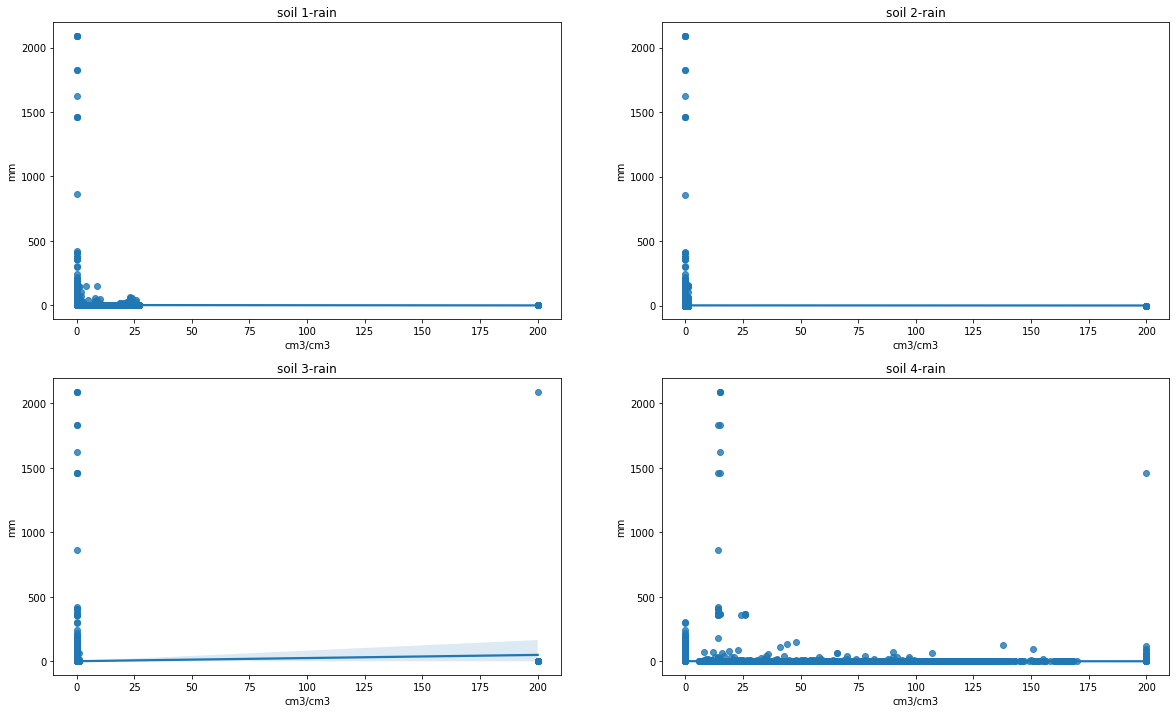

In [136]:
fig, axs = plt.subplots(ncols=2, nrows=2,figsize=(20,12))

axs1 = sns.regplot(data=sarai, x='Soil_1_Moist', y='Rain',ax=axs[0,0])
axs1.set_title('soil 1-rain', fontdict={'fontsize':12})
axs1.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
axs1.set_ylabel('mm', fontdict={'fontsize':10})
#axs1.set_yticks(np.arange(0,600,100))
axs1.tick_params(axis='both', labelsize=10)

axs2 = sns.regplot(data=sarai, x='Soil_2_Moist', y='Rain',ax=axs[0,1])
axs2.set_title('soil 2-rain', fontdict={'fontsize':12})
axs2.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
axs2.set_ylabel('mm', fontdict={'fontsize':10})
#axs2.set_yticks(np.arange(0,600,100))
axs2.tick_params(axis='both', labelsize=10)

axs3 = sns.regplot(data=sarai, x='Soil_3_Moist', y='Rain',ax=axs[1,0])
axs3.set_title('soil 3-rain', fontdict={'fontsize':12})
axs3.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
axs3.set_ylabel('mm', fontdict={'fontsize':10})
#axs3.set_yticks(np.arange(0,600,100))
axs3.tick_params(axis='both', labelsize=10)

axs4 = sns.regplot(data=sarai, x='Soil_4_Moist', y='Rain',ax=axs[1,1])
axs4.set_title('soil 4-rain', fontdict={'fontsize':12})
axs4.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
axs4.set_ylabel('mm', fontdict={'fontsize':10})
#axs4.set_yticks(np.arange(0,600,100))
axs4.tick_params(axis='both', labelsize=10)

plt.show()

##### _**Soil-Rain Rate**_

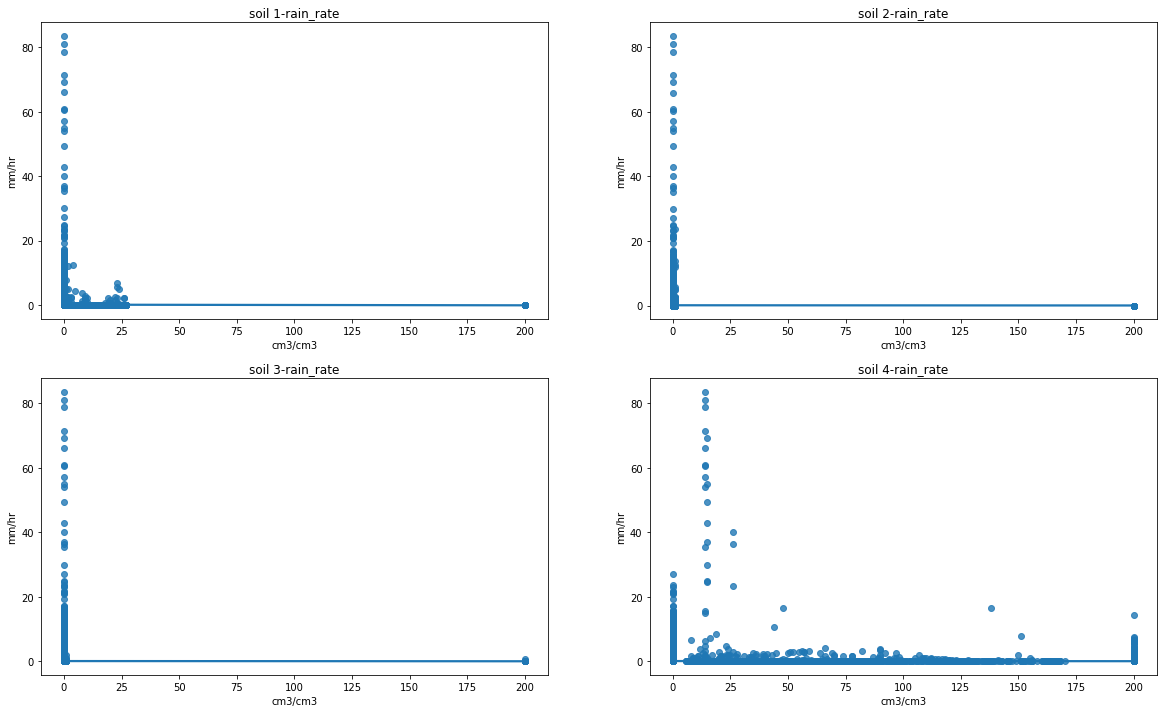

In [137]:
fig, axs = plt.subplots(ncols=2, nrows=2,figsize=(20,12))

axs1 = sns.regplot(data=sarai, x='Soil_1_Moist', y='Rain_Rate', ax=axs[0,0])
axs1.set_title('soil 1-rain_rate', fontdict={'fontsize':12})
axs1.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
axs1.set_ylabel('mm/hr', fontdict={'fontsize':10})
#axs1.set_yticks(np.arange(0,600,100))
axs1.tick_params(axis='both', labelsize=10)

axs2 = sns.regplot(data=sarai, x='Soil_2_Moist', y='Rain_Rate',ax=axs[0,1])
axs2.set_title('soil 2-rain_rate', fontdict={'fontsize':12})
axs2.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
axs2.set_ylabel('mm/hr', fontdict={'fontsize':10})
#axs2.set_yticks(np.arange(0,600,100))
axs2.tick_params(axis='both', labelsize=10)

axs3 = sns.regplot(data=sarai, x='Soil_3_Moist', y='Rain_Rate',ax=axs[1,0])
axs3.set_title('soil 3-rain_rate', fontdict={'fontsize':12})
axs3.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
axs3.set_ylabel('mm/hr', fontdict={'fontsize':10})
#axs3.set_yticks(np.arange(0,600,100))
axs3.tick_params(axis='both', labelsize=10)

axs4 = sns.regplot(data=sarai, x='Soil_4_Moist', y='Rain_Rate',ax=axs[1,1])
axs4.set_title('soil 4-rain_rate', fontdict={'fontsize':12})
axs4.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
axs4.set_ylabel('mm/hr', fontdict={'fontsize':10})
#axs4.set_yticks(np.arange(0,600,100))
axs4.tick_params(axis='both', labelsize=10)

plt.show()

##### _**Value ranges-SENTINEL**_

In [138]:
sentinel_range = sentinel.groupby([sentinel.Brgy, sentinel.Year]).min().drop(labels=['id'],axis=1)
sentinel_max = sentinel.groupby([sentinel.Brgy, sentinel.Year]).max()
sentinel_range.rename(
    columns={'Date':'date_min','Soil_Moisture':'min'},inplace=True
)
sentinel_range['date_max']=sentinel_max.Date
sentinel_range['max'] = sentinel_max.Soil_Moisture
sentinel_range['range'] = sentinel_range['max'] - sentinel_range['min']
sentinel_range

date_min       min   date_max       max     range
Brgy             Year                                                    
Agpay            2016 2016-04-17  0.286696 2016-12-02  0.540522  0.253826
                 2017 2017-01-06  0.416594 2017-12-08  0.535412  0.118818
                 2018 2018-01-01  0.363069 2018-12-06  0.544692  0.181623
                 2019 2019-01-09  0.451482 2019-12-06  0.535687  0.084205
                 2020 2020-01-28  0.493770 2020-12-29  0.534501  0.040731
Binogsacan Lower 2016 2016-04-17  0.398691 2016-12-02  0.557887  0.159196
                 2017 2017-01-06  0.323048 2017-12-08  0.562272  0.239224
                 2018 2018-01-01  0.438723 2018-12-06  0.566287  0.127564
                 2019 2019-01-09  0.354678 2019-12-06  0.563117  0.208439
                 2020 2020-01-28  0.338517 2020-12-29  0.563734  0.225217
Binogsacan Upper 2016 2016-04-17  0.509204 2016-12-02  0.558167  0.048963
                 2017 2017-01-06  0.334986 2017-12-08  0.560883  0.225897
                 2018 2018-01-01  0.461235 2018-12-06  0.563681  0.102446
                 2019 2019-01-09  0.400453 2019-12-06  0.560883  0.160430
                 2020 2020-01-28  0.391857 2020-12-29  0.560097  0.168240
Calzada          2016 2016-04-17  0.261724 2016-12-02  0.545455  0.283731
                 2017 2017-01-06  0.326946 2017-12-08  0.542904  0.215958
                 2018 2018-01-01  0.091957 2018-12-06  0.536648  0.444691
                 2019 2019-01-09  0.282640 2019-12-06  0.542904  0.260264
                 2020 2020-01-28  0.286309 2020-12-29  0.541076  0.254767
Catomag          2016 2016-04-17  0.498398 2016-12-02  0.549345  0.050947
                 2017 2017-01-06  0.316228 2017-12-08  0.544402  0.228174
                 2018 2018-01-01  0.408068 2018-12-06  0.544692  0.136624
                 2019 2019-01-09  0.432220 2019-12-06  0.544402  0.112182
                 2020 2020-01-28  0.508481 2020-12-29  0.537146  0.028665
Malabnig         2016 2016-04-17  0.526422 2016-12-02  0.559361  0.032939
                 2017 2017-01-06  0.265557 2017-12-08  0.551893  0.286336
                 2018 2018-01-01  0.363598 2018-12-06  0.549441  0.185843
                 2019 2019-01-09  0.371187 2019-12-06  0.551893  0.180706
                 2020 2020-01-28  0.399311 2020-12-29  0.549116  0.149805
Morera           2016 2016-04-17  0.435429 2016-12-02  0.566180  0.130751
                 2017 2017-01-06  0.290405 2017-12-08  0.560811  0.270406
                 2018 2018-01-01  0.316160 2018-12-06  0.563219  0.247059
                 2019 2019-01-09  0.325413 2019-12-06  0.560384  0.234971
                 2020 2020-01-28  0.129850 2020-12-29  0.569293  0.439443

##### _**Value ranges-SARAi**_

In [139]:
sarai_range = sarai.groupby([sarai.Date.dt.year]).min().drop(labels=['Year','Month'],axis=1)
sarai_range.rename(
    columns={'Date':'date_min','Time':'time_min','Rain_Rate':'rain_rate_min','Rain':'rain_min','Soil_1_Moist':'soil_1_min',
    'Soil_2_Moist':'soil_2_min','Soil_3_Moist':'soil_3_min','Soil_4_Moist':'soil_4_min'},inplace=True
)
sarai_range['date_max']= sarai.groupby([sarai.Date.dt.year]).max().drop(labels=['Year','Month'],axis=1).Date
sarai_range['time_max']= sarai.groupby([sarai.Date.dt.year]).max().drop(labels=['Year','Month'],axis=1).Time
sarai_range['rain_rate_max']= sarai.groupby([sarai.Date.dt.year]).max().drop(labels=['Year','Month'],axis=1).Rain_Rate
sarai_range['rain_max']= sarai.groupby([sarai.Date.dt.year]).max().drop(labels=['Year','Month'],axis=1).Rain
sarai_range['soil_1_max']= sarai.groupby([sarai.Date.dt.year]).max().drop(labels=['Year','Month'],axis=1).Soil_1_Moist
sarai_range['soil_2_max']= sarai.groupby([sarai.Date.dt.year]).max().drop(labels=['Year','Month'],axis=1).Soil_2_Moist
sarai_range['soil_3_max']= sarai.groupby([sarai.Date.dt.year]).max().drop(labels=['Year','Month'],axis=1).Soil_3_Moist
sarai_range['soil_4_max']= sarai.groupby([sarai.Date.dt.year]).max().drop(labels=['Year','Month'],axis=1).Soil_4_Moist
sarai_range

,date_min,time_min,rain_rate_min,rain_min,soil_1_min,soil_2_min,soil_3_min,soil_4_min,date_max,time_max,rain_rate_max,rain_max,soil_1_max,soil_2_max,soil_3_max,soil_4_max
Date,,,,,,,,,,,,,,,,
2016,2016-04-21,10:00 AM,0.0,0.0,0.0,0.0,0.0,0.0,2016-12-31,9:45 PM,41.40,304.8,0.0,0.0,0.0,0.0
2017,2017-01-01,10:00 AM,0.0,0.0,0.0,0.0,0.0,0.0,2017-12-31,9:45 PM,23.62,218.4,27.0,1.0,0.0,0.0
2018,2018-01-01,10:00 AM,0.0,0.0,0.0,0.0,0.0,0.0,2018-12-31,9:45 PM,17.02,2090.2,200.0,200.0,200.0,200.0
2019,2019-01-01,10:00 AM,0.0,0.0,0.0,0.0,0.0,0.0,2019-12-31,9:45 PM,19.30,457.2,1.0,0.0,0.0,0.0
2020,2020-01-01,10:00 AM,0.0,0.0,0.0,0.0,0.0,0.0,2020-12-16,9:45 PM,91.44,2090.2,1.0,1.0,1.0,200.0


##### _**Standard Deviation-AWS**_

In [140]:
aws_sd = aws.groupby([aws.date.dt.year]).std()
aws_sd['avg'] = aws.groupby([aws.date.dt.year]).mean().rain
aws_sd

,rain,avg
date,,
2016,18.725444,6.892418
2017,15.822003,7.736849
2018,22.378843,7.869692
2019,18.936538,6.125890
2020,25.663601,9.037650


##### _**Standard Deviation-SARAi**_

In [141]:
sarai_sd = sarai.groupby([sarai.Date.dt.year]).std(ddof=0).drop(labels=['Year'],axis=1)
sarai_sd

,Rain_Rate,Rain,Soil_1_Moist,Soil_2_Moist,Soil_3_Moist,Soil_4_Moist
Date,,,,,,
2016,0.766256,9.241387,0.000000,0.000000,0.000000,0.000000
2017,0.578880,7.097624,3.936422,0.048227,0.000000,0.000000
2018,0.546969,14.761358,8.132192,8.131965,8.230537,8.132457
2019,0.310032,4.961279,0.159472,0.000000,0.000000,0.000000
2020,3.068577,61.580270,0.039839,0.089736,0.109553,86.843113


##### _**Average-SARAi**_

In [142]:
sarai_avg = sarai.groupby([sarai.Date.dt.year]).mean().drop(labels=['Year'],axis=1)
sarai_avg

,Rain_Rate,Rain,Soil_1_Moist,Soil_2_Moist,Soil_3_Moist,Soil_4_Moist
Date,,,,,,
2016,0.089088,1.082257,0.000000,0.000000,0.000000,0.000000
2017,0.073563,0.863233,1.014396,0.002331,0.000000,0.000000
2018,0.074382,0.940799,0.342502,0.331193,0.339284,0.331233
2019,0.026172,0.286150,0.026113,0.000000,0.000000,0.000000
2020,0.208615,3.547242,0.001590,0.008119,0.012149,139.742593


### _**Hazard Map (parametric conversion)**_

##### _**Water-content**_

In [143]:
sentinel_avg_brgy
sentinel_avg_brgy['mm_50mm_5cm'] = sentinel_avg_brgy.Soil_Moisture * 50
sentinel_avg_brgy['mm_500mm_50cm'] = sentinel_avg_brgy.mm_50mm_5cm * 10
sentinel_avg_brgy['mm_550mm_55cm'] = sentinel_avg_brgy.mm_50mm_5cm * 11
sentinel_avg_brgy['mm_600mm_60cm'] = sentinel_avg_brgy.mm_50mm_5cm * 12
sentinel_avg_brgy['mm_1200mm_120cm'] = sentinel_avg_brgy.mm_50mm_5cm * 24
sentinel_avg_brgy

,Brgy,Soil_Moisture,mm_50mm_5cm,mm_500mm_50cm,mm_550mm_55cm,mm_600mm_60cm,mm_1200mm_120cm
0,Agpay,0.508438,25.421913,254.219127,279.641040,305.062953,610.125906
1,Binogsacan Lower,0.518725,25.936243,259.362431,285.298675,311.234918,622.469835
2,Binogsacan Upper,0.528352,26.417605,264.176049,290.593654,317.011259,634.022518
3,Calzada,0.478786,23.939306,239.393059,263.332365,287.271671,574.543341
4,Catomag,0.524287,26.214347,262.143471,288.357818,314.572165,629.144329
5,Malabnig,0.517511,25.875536,258.755363,284.630899,310.506435,621.012871
6,Morera,0.494518,24.725886,247.258863,271.984749,296.710635,593.421271


##### _**Soil+Aggregates**_

In [144]:
sentinel_agg = sentinel_avg_brgy.copy()
sentinel_agg.mm_50mm_5cm = 50 - sentinel_agg.mm_50mm_5cm
sentinel_agg.mm_500mm_50cm = 500 - sentinel_agg.mm_500mm_50cm
sentinel_agg.mm_550mm_55cm = 550 - sentinel_agg.mm_550mm_55cm
sentinel_agg.mm_600mm_60cm = 600 - sentinel_agg.mm_600mm_60cm
sentinel_agg.mm_1200mm_120cm = 1200 - sentinel_agg.mm_1200mm_120cm
sentinel_agg

,Brgy,Soil_Moisture,mm_50mm_5cm,mm_500mm_50cm,mm_550mm_55cm,mm_600mm_60cm,mm_1200mm_120cm
0,Agpay,0.508438,24.578087,245.780873,270.358960,294.937047,589.874094
1,Binogsacan Lower,0.518725,24.063757,240.637569,264.701325,288.765082,577.530165
2,Binogsacan Upper,0.528352,23.582395,235.823951,259.406346,282.988741,565.977482
3,Calzada,0.478786,26.060694,260.606941,286.667635,312.728329,625.456659
4,Catomag,0.524287,23.785653,237.856529,261.642182,285.427835,570.855671
5,Malabnig,0.517511,24.124464,241.244637,265.369101,289.493565,578.987129
6,Morera,0.494518,25.274114,252.741137,278.015251,303.289365,606.578729


##### _**Permeability metrics**_

In [145]:
permeabilityFC = (5.1 * 24 * 30) * 0.32
permeabilityR = (5.1 * 24 * 30) * 0.68
avg_perm = int(sentinel_agg.mm_550mm_55cm.mean())
print(permeabilityFC)
print(permeabilityR)
print((permeabilityFC - avg_perm)+permeabilityR)
print((permeabilityFC - avg_perm + permeabilityR) / 10 / 2.54 / 12)

1175.04
2496.96
3403.0
11.164698162729659


##### _**Permeability w/ Field Capacity factor**_

In [146]:
permeabilityAWS = aws_monthly_total.copy()
permeabilityAWS['FC'] = permeabilityAWS.rain * 0.32
permeabilityAWS['R'] = permeabilityAWS.rain * 0.68
permeabilityAWS

,date,rain,FC,R
0,Jan,1046.525,334.888,711.637
1,Feb,507.875,162.520,345.355
2,Mar,357.125,114.280,242.845
3,Apr,204.875,65.560,139.315
4,May,615.000,196.800,418.200
5,Jun,842.150,269.488,572.662
6,Jul,1129.075,361.304,767.771
7,Aug,1296.475,414.872,881.603
8,Sep,1254.725,401.512,853.213
9,Oct,2099.375,671.800,1427.575


##### _**Agpay**_

In [147]:
agpay_wet = float(sentinel_agg[sentinel_agg.Brgy=='Agpay'].mm_550mm_55cm)
agpay_dry = float(sentinel_agg[sentinel_agg.Brgy=='Agpay'].mm_1200mm_120cm)
agpay = permeabilityAWS.copy()
agpay['exc_wet'] = agpay['FC'] - agpay_wet
agpay['exc_dry'] = agpay['FC'] - agpay_dry
agpay['total_exc_wet'] = np.where(agpay.exc_wet < 0, agpay.R, agpay.R+agpay.exc_wet)
agpay['total_exc_wet'] = np.where(agpay.rain < 1087.8, np.nan, agpay.total_exc_wet)
agpay['total_exc_dry'] = np.where(agpay.exc_dry < 0, agpay.R, agpay.R+agpay.exc_dry)
agpay['total_exc_dry'] = np.where(agpay.rain > 1087.8, np.nan, agpay.total_exc_dry)
agpay['wet_ft'] = round(((agpay.total_exc_wet / 10) / 2.54) / 12,ndigits=2)
agpay['dry_ft'] = round(((agpay.total_exc_dry / 10) / 2.54) / 12,ndigits=2)
agpay
#agpay.to_csv('agpay.csv',index=False)

,date,rain,FC,R,exc_wet,exc_dry,total_exc_wet,total_exc_dry,wet_ft,dry_ft
0,Jan,1046.525,334.888,711.637,64.52904,-254.986094,NaN,711.637,NaN,2.33
1,Feb,507.875,162.520,345.355,-107.83896,-427.354094,NaN,345.355,NaN,1.13
2,Mar,357.125,114.280,242.845,-156.07896,-475.594094,NaN,242.845,NaN,0.80
3,Apr,204.875,65.560,139.315,-204.79896,-524.314094,NaN,139.315,NaN,0.46
4,May,615.000,196.800,418.200,-73.55896,-393.074094,NaN,418.200,NaN,1.37
5,Jun,842.150,269.488,572.662,-0.87096,-320.386094,NaN,572.662,NaN,1.88
6,Jul,1129.075,361.304,767.771,90.94504,-228.570094,858.71604,NaN,2.82,NaN
7,Aug,1296.475,414.872,881.603,144.51304,-175.002094,1026.11604,NaN,3.37,NaN
8,Sep,1254.725,401.512,853.213,131.15304,-188.362094,984.36604,NaN,3.23,NaN
9,Oct,2099.375,671.800,1427.575,401.44104,81.925906,1829.01604,NaN,6.00,NaN


##### _**Binogsacan Upper**_

In [148]:
binogup_wet = float(sentinel_agg[sentinel_agg.Brgy=='Binogsacan Upper'].mm_550mm_55cm)
binogup_dry = float(sentinel_agg[sentinel_agg.Brgy=='Binogsacan Upper'].mm_1200mm_120cm)
binogup = permeabilityAWS.copy()
binogup['exc_wet'] = binogup['FC'] - binogup_wet
binogup['exc_dry'] = binogup['FC'] - binogup_dry
binogup['total_exc_wet'] = np.where(binogup.exc_wet < 0, binogup.R, binogup.R+binogup.exc_wet)
binogup['total_exc_wet'] = np.where(binogup.rain < 1087.8, np.nan, binogup.total_exc_wet)
binogup['total_exc_dry'] = np.where(binogup.exc_dry < 0, binogup.R, binogup.R+binogup.exc_dry)
binogup['total_exc_dry'] = np.where(binogup.rain > 1087.8, np.nan, binogup.total_exc_dry)
binogup['wet_ft'] = round(((binogup.total_exc_wet / 10) / 2.54) / 12,ndigits=2)
binogup['dry_ft'] = round(((binogup.total_exc_dry / 10) / 2.54) / 12,ndigits=2)
binogup
#binogup.to_csv('binogup.csv',index=False)

,date,rain,FC,R,exc_wet,exc_dry,total_exc_wet,total_exc_dry,wet_ft,dry_ft
0,Jan,1046.525,334.888,711.637,75.481654,-231.089482,NaN,711.637,NaN,2.33
1,Feb,507.875,162.520,345.355,-96.886346,-403.457482,NaN,345.355,NaN,1.13
2,Mar,357.125,114.280,242.845,-145.126346,-451.697482,NaN,242.845,NaN,0.80
3,Apr,204.875,65.560,139.315,-193.846346,-500.417482,NaN,139.315,NaN,0.46
4,May,615.000,196.800,418.200,-62.606346,-369.177482,NaN,418.200,NaN,1.37
5,Jun,842.150,269.488,572.662,10.081654,-296.489482,NaN,572.662,NaN,1.88
6,Jul,1129.075,361.304,767.771,101.897654,-204.673482,869.668654,NaN,2.85,NaN
7,Aug,1296.475,414.872,881.603,155.465654,-151.105482,1037.068654,NaN,3.40,NaN
8,Sep,1254.725,401.512,853.213,142.105654,-164.465482,995.318654,NaN,3.27,NaN
9,Oct,2099.375,671.800,1427.575,412.393654,105.822518,1839.968654,NaN,6.04,NaN


##### _**Binogsacan Lower**_

In [149]:
binoglo_wet = float(sentinel_agg[sentinel_agg.Brgy=='Binogsacan Lower'].mm_550mm_55cm)
binoglo_dry = float(sentinel_agg[sentinel_agg.Brgy=='Binogsacan Lower'].mm_1200mm_120cm)
binoglo = permeabilityAWS.copy()
binoglo['exc_wet'] = binoglo['FC'] - binoglo_wet
binoglo['exc_dry'] = binoglo['FC'] - binoglo_dry
binoglo['total_exc_wet'] = np.where(binoglo.exc_wet < 0, binoglo.R, binoglo.R+binoglo.exc_wet)
binoglo['total_exc_wet'] = np.where(binoglo.rain < 1087.8, np.nan, binoglo.total_exc_wet)
binoglo['total_exc_dry'] = np.where(binoglo.exc_dry < 0, binoglo.R, binoglo.R+binoglo.exc_dry)
binoglo['total_exc_dry'] = np.where(binoglo.rain > 1087.8, np.nan, binoglo.total_exc_dry)
binoglo['wet_ft'] = round(((binoglo.total_exc_wet / 10) / 2.54) / 12,ndigits=2)
binoglo['dry_ft'] = round(((binoglo.total_exc_dry / 10) / 2.54) / 12,ndigits=2)
binoglo
#binoglo.to_csv('binoglo.csv',index=False)

,date,rain,FC,R,exc_wet,exc_dry,total_exc_wet,total_exc_dry,wet_ft,dry_ft
0,Jan,1046.525,334.888,711.637,70.186675,-242.642165,NaN,711.637,NaN,2.33
1,Feb,507.875,162.520,345.355,-102.181325,-415.010165,NaN,345.355,NaN,1.13
2,Mar,357.125,114.280,242.845,-150.421325,-463.250165,NaN,242.845,NaN,0.80
3,Apr,204.875,65.560,139.315,-199.141325,-511.970165,NaN,139.315,NaN,0.46
4,May,615.000,196.800,418.200,-67.901325,-380.730165,NaN,418.200,NaN,1.37
5,Jun,842.150,269.488,572.662,4.786675,-308.042165,NaN,572.662,NaN,1.88
6,Jul,1129.075,361.304,767.771,96.602675,-216.226165,864.373675,NaN,2.84,NaN
7,Aug,1296.475,414.872,881.603,150.170675,-162.658165,1031.773675,NaN,3.39,NaN
8,Sep,1254.725,401.512,853.213,136.810675,-176.018165,990.023675,NaN,3.25,NaN
9,Oct,2099.375,671.800,1427.575,407.098675,94.269835,1834.673675,NaN,6.02,NaN


##### _**Calzada**_

In [150]:
calzada_wet = float(sentinel_agg[sentinel_agg.Brgy=='Calzada'].mm_550mm_55cm)
calzada_dry = float(sentinel_agg[sentinel_agg.Brgy=='Calzada'].mm_1200mm_120cm)
calzada = permeabilityAWS.copy()
calzada['exc_wet'] = calzada['FC'] - calzada_wet
calzada['exc_dry'] = calzada['FC'] - calzada_dry
calzada['total_exc_wet'] = np.where(calzada.exc_wet < 0, calzada.R, calzada.R+calzada.exc_wet)
calzada['total_exc_wet'] = np.where(calzada.rain < 1087.8, np.nan, calzada.total_exc_wet)
calzada['total_exc_dry'] = np.where(calzada.exc_dry < 0, calzada.R, calzada.R+calzada.exc_dry)
calzada['total_exc_dry'] = np.where(calzada.rain > 1087.8, np.nan, calzada.total_exc_dry)
calzada['wet_ft'] = round(((calzada.total_exc_wet / 10) / 2.54) / 12,ndigits=2)
calzada['dry_ft'] = round(((calzada.total_exc_dry / 10) / 2.54) / 12,ndigits=2)
calzada
#calzada.to_csv('calzada.csv',index=False)

,date,rain,FC,R,exc_wet,exc_dry,total_exc_wet,total_exc_dry,wet_ft,dry_ft
0,Jan,1046.525,334.888,711.637,48.220365,-290.568659,NaN,711.637,NaN,2.33
1,Feb,507.875,162.520,345.355,-124.147635,-462.936659,NaN,345.355,NaN,1.13
2,Mar,357.125,114.280,242.845,-172.387635,-511.176659,NaN,242.845,NaN,0.80
3,Apr,204.875,65.560,139.315,-221.107635,-559.896659,NaN,139.315,NaN,0.46
4,May,615.000,196.800,418.200,-89.867635,-428.656659,NaN,418.200,NaN,1.37
5,Jun,842.150,269.488,572.662,-17.179635,-355.968659,NaN,572.662,NaN,1.88
6,Jul,1129.075,361.304,767.771,74.636365,-264.152659,842.407365,NaN,2.76,NaN
7,Aug,1296.475,414.872,881.603,128.204365,-210.584659,1009.807365,NaN,3.31,NaN
8,Sep,1254.725,401.512,853.213,114.844365,-223.944659,968.057365,NaN,3.18,NaN
9,Oct,2099.375,671.800,1427.575,385.132365,46.343341,1812.707365,NaN,5.95,NaN


##### _**Catomag**_

In [151]:
catomag_wet = float(sentinel_agg[sentinel_agg.Brgy=='Catomag'].mm_550mm_55cm)
catomag_dry = float(sentinel_agg[sentinel_agg.Brgy=='Catomag'].mm_1200mm_120cm)
catomag = permeabilityAWS.copy()
catomag['exc_wet'] = catomag['FC'] - catomag_wet
catomag['exc_dry'] = catomag['FC'] - catomag_dry
catomag['total_exc_wet'] = np.where(catomag.exc_wet < 0, catomag.R, catomag.R+catomag.exc_wet)
catomag['total_exc_wet'] = np.where(catomag.rain < 1087.8, np.nan, catomag.total_exc_wet)
catomag['total_exc_dry'] = np.where(catomag.exc_dry < 0, catomag.R, catomag.R+catomag.exc_dry)
catomag['total_exc_dry'] = np.where(catomag.rain > 1087.8, np.nan, catomag.total_exc_dry)
catomag['wet_ft'] = round(((catomag.total_exc_wet / 10) / 2.54) / 12,ndigits=2)
catomag['dry_ft'] = round(((catomag.total_exc_dry / 10) / 2.54) / 12,ndigits=2)
catomag
#catomag.to_csv('catomag.csv',index=False)

,date,rain,FC,R,exc_wet,exc_dry,total_exc_wet,total_exc_dry,wet_ft,dry_ft
0,Jan,1046.525,334.888,711.637,73.245818,-235.967671,NaN,711.637,NaN,2.33
1,Feb,507.875,162.520,345.355,-99.122182,-408.335671,NaN,345.355,NaN,1.13
2,Mar,357.125,114.280,242.845,-147.362182,-456.575671,NaN,242.845,NaN,0.80
3,Apr,204.875,65.560,139.315,-196.082182,-505.295671,NaN,139.315,NaN,0.46
4,May,615.000,196.800,418.200,-64.842182,-374.055671,NaN,418.200,NaN,1.37
5,Jun,842.150,269.488,572.662,7.845818,-301.367671,NaN,572.662,NaN,1.88
6,Jul,1129.075,361.304,767.771,99.661818,-209.551671,867.432818,NaN,2.85,NaN
7,Aug,1296.475,414.872,881.603,153.229818,-155.983671,1034.832818,NaN,3.40,NaN
8,Sep,1254.725,401.512,853.213,139.869818,-169.343671,993.082818,NaN,3.26,NaN
9,Oct,2099.375,671.800,1427.575,410.157818,100.944329,1837.732818,NaN,6.03,NaN


##### _**Malabnig**_

In [152]:
malab_wet = float(sentinel_agg[sentinel_agg.Brgy=='Malabnig'].mm_550mm_55cm)
malab_dry = float(sentinel_agg[sentinel_agg.Brgy=='Malabnig'].mm_1200mm_120cm)
malabnig = permeabilityAWS.copy()
malabnig['exc_wet'] = malabnig['FC'] - malab_wet
malabnig['exc_dry'] = malabnig['FC'] - malab_dry
malabnig['total_exc_wet'] = np.where(malabnig.exc_wet < 0, malabnig.R, malabnig.R+malabnig.exc_wet)
malabnig['total_exc_wet'] = np.where(malabnig.rain < 1087.8, np.nan, malabnig.total_exc_wet)
malabnig['total_exc_dry'] = np.where(malabnig.exc_dry < 0, malabnig.R, malabnig.R+malabnig.exc_dry)
malabnig['total_exc_dry'] = np.where(malabnig.rain > 1087.8, np.nan, malabnig.total_exc_dry)
malabnig['wet_ft'] = round(((malabnig.total_exc_wet / 10) / 2.54) / 12,ndigits=2)
malabnig['dry_ft'] = round(((malabnig.total_exc_dry / 10) / 2.54) / 12,ndigits=2)
malabnig
#malabnig.to_csv('malabnig.csv',index=False)

,date,rain,FC,R,exc_wet,exc_dry,total_exc_wet,total_exc_dry,wet_ft,dry_ft
0,Jan,1046.525,334.888,711.637,69.518899,-244.099129,NaN,711.637,NaN,2.33
1,Feb,507.875,162.520,345.355,-102.849101,-416.467129,NaN,345.355,NaN,1.13
2,Mar,357.125,114.280,242.845,-151.089101,-464.707129,NaN,242.845,NaN,0.80
3,Apr,204.875,65.560,139.315,-199.809101,-513.427129,NaN,139.315,NaN,0.46
4,May,615.000,196.800,418.200,-68.569101,-382.187129,NaN,418.200,NaN,1.37
5,Jun,842.150,269.488,572.662,4.118899,-309.499129,NaN,572.662,NaN,1.88
6,Jul,1129.075,361.304,767.771,95.934899,-217.683129,863.705899,NaN,2.83,NaN
7,Aug,1296.475,414.872,881.603,149.502899,-164.115129,1031.105899,NaN,3.38,NaN
8,Sep,1254.725,401.512,853.213,136.142899,-177.475129,989.355899,NaN,3.25,NaN
9,Oct,2099.375,671.800,1427.575,406.430899,92.812871,1834.005899,NaN,6.02,NaN


##### _**Morera**_

In [153]:
morer_wet = float(sentinel_agg[sentinel_agg.Brgy=='Morera'].mm_550mm_55cm)
morer_dry = float(sentinel_agg[sentinel_agg.Brgy=='Morera'].mm_1200mm_120cm)
morera = permeabilityAWS.copy()
morera['exc_wet'] = morera['FC'] - morer_wet
morera['exc_dry'] = morera['FC'] - morer_dry
morera['total_exc_wet'] = np.where(morera.exc_wet < 0, morera.R, morera.R+morera.exc_wet)
morera['total_exc_wet'] = np.where(morera.rain < 1087.8, np.nan, morera.total_exc_wet)
morera['total_exc_dry'] = np.where(morera.exc_dry < 0, morera.R, morera.R+morera.exc_dry)
morera['total_exc_dry'] = np.where(morera.rain > 1087.8, np.nan, morera.total_exc_dry)
morera['wet_ft'] = round(((morera.total_exc_wet / 10) / 2.54) / 12,ndigits=2)
morera['dry_ft'] = round(((morera.total_exc_dry / 10) / 2.54) / 12,ndigits=2)
morera
#morera.to_csv('morera.csv',index=False)

,date,rain,FC,R,exc_wet,exc_dry,total_exc_wet,total_exc_dry,wet_ft,dry_ft
0,Jan,1046.525,334.888,711.637,56.872749,-271.690729,NaN,711.637,NaN,2.33
1,Feb,507.875,162.520,345.355,-115.495251,-444.058729,NaN,345.355,NaN,1.13
2,Mar,357.125,114.280,242.845,-163.735251,-492.298729,NaN,242.845,NaN,0.80
3,Apr,204.875,65.560,139.315,-212.455251,-541.018729,NaN,139.315,NaN,0.46
4,May,615.000,196.800,418.200,-81.215251,-409.778729,NaN,418.200,NaN,1.37
5,Jun,842.150,269.488,572.662,-8.527251,-337.090729,NaN,572.662,NaN,1.88
6,Jul,1129.075,361.304,767.771,83.288749,-245.274729,851.059749,NaN,2.79,NaN
7,Aug,1296.475,414.872,881.603,136.856749,-191.706729,1018.459749,NaN,3.34,NaN
8,Sep,1254.725,401.512,853.213,123.496749,-205.066729,976.709749,NaN,3.20,NaN
9,Oct,2099.375,671.800,1427.575,393.784749,65.221271,1821.359749,NaN,5.98,NaN


##### _**Excess contribution in feet for rainfall >median**_

In [154]:
month_exc = agpay.iloc[6:].date
agpay_exc = agpay.iloc[6:].wet_ft
bu_exc = binogup.iloc[6:].wet_ft
bl_exc = binoglo.iloc[6:].wet_ft
calz_exc = calzada.iloc[6:].wet_ft
cat_exc = catomag.iloc[6:].wet_ft
malab_exc = malabnig.iloc[6:].wet_ft
morer_exc = morera.iloc[6:].wet_ft

wet_ft = pd.DataFrame({'Month':month_exc,'Agpay':agpay_exc, 'Binogsacan Upper':bu_exc,'Binogsacan Lower':bl_exc,'Calzada':calz_exc,
'Catomag':cat_exc,'Malabnig':malab_exc,'Morera':morer_exc})
wet_ft

,Month,Agpay,Binogsacan Upper,Binogsacan Lower,Calzada,Catomag,Malabnig,Morera
6,Jul,2.82,2.85,2.84,2.76,2.85,2.83,2.79
7,Aug,3.37,3.40,3.39,3.31,3.40,3.38,3.34
8,Sep,3.23,3.27,3.25,3.18,3.26,3.25,3.20
9,Oct,6.00,6.04,6.02,5.95,6.03,6.02,5.98
10,Nov,3.84,3.87,3.86,3.79,3.87,3.85,3.81
11,Dec,6.87,6.91,6.89,6.82,6.90,6.89,6.85


##### _**Excess contribution in feet if rainfall >~3000mm**_

In [155]:
agpmax = 1175.04 - agpay_wet
bumax = 1175.04 - binogup_wet
blomax = 1175.04 - binoglo_wet
calmax = 1175.04 - calzada_wet
catmax = 1175.04 - catomag_wet
malabmax = 1175.04 - malab_wet
moremax = 1175.04 - morer_wet
seriesmax = pd.Series([agpmax,bumax,blomax,calmax,catmax,malabmax,moremax])
seriestotalmax = seriesmax + permeabilityR
series_ft = seriestotalmax / 10 / 2.54 / 12
max_excess = pd.DataFrame({'Brgy':sentinel_agg.Brgy, 'excess':seriesmax,'total_excess':seriestotalmax,'total_ft':series_ft})
max_excess

,Brgy,excess,total_excess,total_ft
0,Agpay,904.681040,3401.641040,11.160240
1,Binogsacan Lower,915.633654,3412.593654,11.196173
2,Binogsacan Upper,910.338675,3407.298675,11.178801
3,Calzada,888.372365,3385.332365,11.106733
4,Catomag,913.397818,3410.357818,11.188838
5,Malabnig,909.670899,3406.630899,11.176611
6,Morera,897.024749,3393.984749,11.135121
